In [111]:
#General
from os import path
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

#Word cloud
from pprint import pprint
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk import FreqDist
from nltk.tokenize import RegexpTokenizer
import stylecloud

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
df = pd.read_csv("DisneylandReviews.csv", index_col=0)

In [3]:
df.head()

Rating Year_Month     Reviewer_Location  \
Review_ID                                            
670772142       4     2019-4             Australia   
670682799       4     2019-5           Philippines   
670623270       4     2019-4  United Arab Emirates   
670607911       4     2019-4             Australia   
670607296       4     2019-4        United Kingdom   

                                                 Review_Text  \
Review_ID                                                      
670772142  If you've ever been to Disneyland anywhere you...   
670682799  Its been a while since d last time we visit HK...   
670623270  Thanks God it wasn   t too hot or too humid wh...   
670607911  HK Disneyland is a great compact park. Unfortu...   
670607296  the location is not in the city, took around 1...   

                        Branch  
Review_ID                       
670772142  Disneyland_HongKong  
670682799  Disneyland_HongKong  
670623270  Disneyland_HongKong  
670607911  Disneyland_HongKong  
670607296  Disneyland_HongKong

In [4]:
df[["Review_Text", "Branch"]].head()

Review_Text  \
Review_ID                                                      
670772142  If you've ever been to Disneyland anywhere you...   
670682799  Its been a while since d last time we visit HK...   
670623270  Thanks God it wasn   t too hot or too humid wh...   
670607911  HK Disneyland is a great compact park. Unfortu...   
670607296  the location is not in the city, took around 1...   

                        Branch  
Review_ID                       
670772142  Disneyland_HongKong  
670682799  Disneyland_HongKong  
670623270  Disneyland_HongKong  
670607911  Disneyland_HongKong  
670607296  Disneyland_HongKong

In [5]:
# Groupby by country
location = df.groupby("Branch")

# Summary statistic of all countries
location.describe().head()

Rating                                             
                         count      mean       std  min  25%  50%  75%  max
Branch                                                                     
Disneyland_California  19406.0  4.405339  0.975600  1.0  4.0  5.0  5.0  5.0
Disneyland_HongKong     9620.0  4.204158  0.932989  1.0  4.0  4.0  5.0  5.0
Disneyland_Paris       13630.0  3.960088  1.205324  1.0  3.0  4.0  5.0  5.0

Above statistics shows that Disneyland California has the bighest number of text reviews followed by Paris and Hongkong

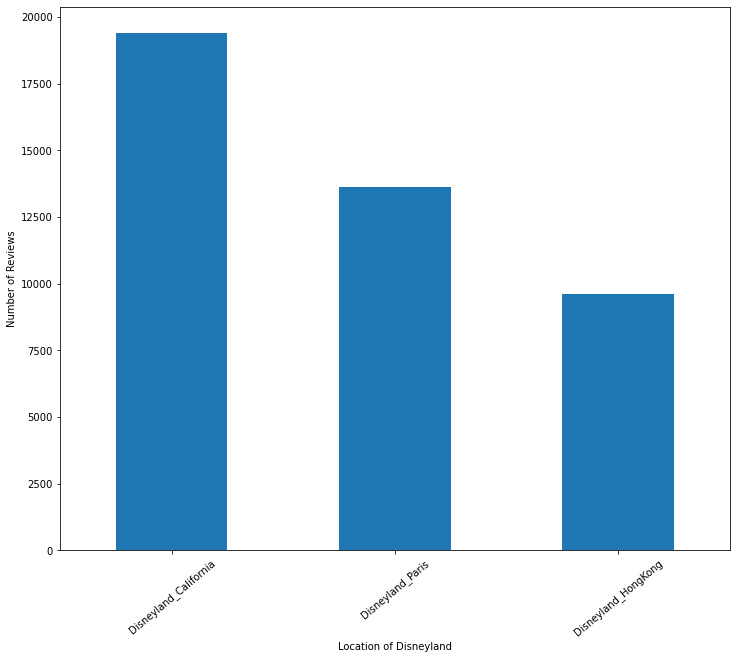

In [6]:
# plotting same statistics graphically to see the review differences in each disneyland
plt.figure(figsize=(12,10))
location.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=40)
plt.xlabel("Location of Disneyland")
plt.ylabel("Number of Reviews")
plt.show()

In [7]:
#separate dataframe into three parts for each disneyland
## California##
df_1 = df[df.Branch == "Disneyland_California"]
df_1.head()
df_California = df_1[["Review_Text", "Branch"]]
df_California.head()
df_California.count()

Review_Text    19406
Branch         19406
dtype: int64

In [8]:
## Hongkong##
df_2 = df[df.Branch == "Disneyland_HongKong"]
df_2.head()
df_HongKong = df_2[["Review_Text", "Branch"]]
df_HongKong.head()
df_HongKong.count()

Review_Text    9620
Branch         9620
dtype: int64

In [9]:
## Paris##
df_3 = df[df.Branch == "Disneyland_Paris"]
df_3.head()
df_Paris = df_3[["Review_Text", "Branch"]]
df_Paris.head()
df_Paris.count()

Review_Text    13630
Branch         13630
dtype: int64

# Rating Word Cloud

### Rating word cloud  for 1,2,3,4,5 gneral 

In [10]:
#Rating for all == 1
df_4 = df[df.Rating == 1]
df_4.head()
df_rat_1 = df_4[["Review_Text", "Rating"]]
df_rat_1.head()

Review_Text  Rating
Review_ID                                                           
662641193  The main attractions were shut while we still ...       1
658624005  Visited Disneyland Hong Kong today March 15, 2...       1
649615606  Every year I come to Disney with my children, ...       1
647822351  I'm writing an honest and truthful opinion of ...       1
647328225  Visited from Australia. Enjoyed the rides, par...       1

In [11]:
#combine all the descrition and create the word cloud for rating 1
rat1 = " ".join(review for review in df_rat_1.Review_Text)
print ("There are {} words in the combination of all review.".format(len(rat1)))

There are 1592826 words in the combination of all review.


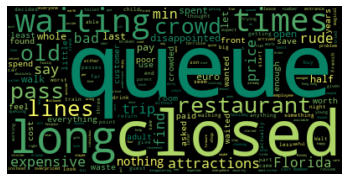

In [12]:
# creating the word cloud from all description,skipping the uppercase text
# Create stopword list:
stopwords1 = set(STOPWORDS)
stopwords1.update(["california", "paris", "hongkong", "rides","disney","disneyland", "now", "will", "even", "got", "finish", "made", "well",
                  "ticket", "need", "park", "the", "them", "your", "us", "disneyland", "us","said",
                  "etc", "dont","make","take","now","one","even","thing","went", "people", "line", "day", "go", "ride", "fun", "see"
                 ,"always","past", "parks", "hours", "place", "time", "world", "really", "wait", "know", "want","though",
                 "still", "visit", "show", "first", "early", "tickets", "micky", "days", "much","theme", "still", "much", "lot"
                  "took", "way", "staff", "hotel", "food", "lot", "minute", "things", "going", "eat", "think", "year", "jone", "age","took",
                 "lots","another", "try", "around", "small", "every", "small","never","hour","minutes", "back","many", "picture",
                  "photo","looked","two","visited","good","better","left","United","Disneyland_California","Disneyland_Paris",
                   "Disneyland_HongKong","great","Kingdom","States","Amazing","A","IN","IT","A","WE","WA","On","SO","What",
                     "that", "From","But","Just","They","There","are","here","money","kid","told","kid","children","parade",
                   "attraction","restaurent","family","character","due","kids","daughter","service","area","next","come",
                  "United","Disneyland_California","Disneyland_Paris","Disneyland_Hongkong",
                   "Fast","Characters","experience","magic","attraction","state","States"])


# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords1, background_color='black', colormap='summer').generate(rat1)

# Display the generated image:
# the matplotlib way:
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis("off")
#plt.show()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

## rating 2

In [13]:
#Rating for all == 2
df_5 = df[df.Rating == 2]
df_5.head()
df_rat_2 = df_5[["Review_Text", "Rating"]]
df_rat_2.head()

Review_Text  Rating
Review_ID                                                           
670571027  Feel so let down with this place,the Disneylan...       2
664668402  I went to HK Disneyland on 5 April which happe...       2
663362365  Didn   t feel the Disney spirit in this place....       2
660285578  Very very small, disappointing all along the l...       2
658697573  As my husband and I had a free day before we f...       2

In [14]:
#combine all the descrition and create the word cloud for rating 2
rat2 = " ".join(review for review in df_rat_2.Review_Text)
print ("There are {} words in the combination of all review.".format(len(rat2)))

There are 2138243 words in the combination of all review.


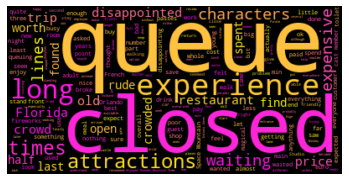

In [15]:
# creating the word cloud from all description,skipping the uppercase text
# Create stopword list:
stopwords2 = set(STOPWORDS)
stopwords2.update(["california", "paris", "hongkong", "rides","disney", "now", "will", "even", "got", "finish", "made", "well",
                  "ticket", "need", "park", "the", "them", "your", "us", "disneyland", "us","said",
                  "etc", "dont","make","take","now","one","even","thing","went", "people", "line", "day", "go", "ride", "fun", "see"
                 ,"always","past", "parks", "hours", "place", "time", "world", "really", "wait", "know", "want","though",
                 "still", "visit", "show", "first", "early", "tickets", "micky", "days", "much","theme", "still", "much", "lot"
                  "took", "way", "staff", "hotel", "food", "lot", "minute", "things", "going", "eat", "think", "year", "jone", "age","took",
                 "lots","another", "try", "around", "small", "every", "small","never","hour","minutes", "back","many", "picture",
                  "photo","looked","two","visited","good","better","left","kid","attraction","character", "say","great","money",
                  "There","are","here","money","kid","told","kid","children","parade",
                   "attraction","restaurent","family","character","due","kids","daughter","service","area","next","come",
                   "United","Disneyland_California","Disneyland_Paris","Disneyland_Hongkong"
                  ,"state","fast","kingdom","love","adventure", "magic", "shows","pass","Holiday","Restaurent","Firework","States"])
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords2, background_color='black', colormap='spring').generate(rat2)

# Display the generated image:
# the matplotlib way:
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis("off")
#plt.show()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

## Rating 3

In [16]:
#Rating for all == 3
df_6 = df[df.Rating == 3]
df_6.head()
df_rat_3 = df_6[["Review_Text", "Rating"]]
df_rat_3.head()

Review_Text  Rating
Review_ID                                                           
670591897  Have been to Disney World, Disneyland Anaheim ...       3
670574142  Think of it as an intro to Disney magic for th...       3
670205135  We brought tickets before we left and got 2 da...       3
670129921  Around   60 per person and if you want to eat ...       3
670022335  First off I'm not a really big Disneyland fan....       3

In [17]:
#combine all the descrition and create the word cloud for rating 2
rat3 = " ".join(review for review in df_rat_3.Review_Text)
print ("There are {} words in the combination of all review.".format(len(rat3)))

There are 4257529 words in the combination of all review.


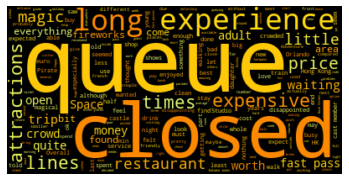

In [18]:
# creating the word cloud from all description,skipping the uppercase text
# Create stopword list:
stopwords3 = set(STOPWORDS)
stopwords3.update(["california", "paris", "hongkong", "rides","disney", "now", "will", "even", "got", "finish", "made", "well",
                  "ticket", "need", "park", "the", "them", "your", "us", "disneyland", "us","said",
                  "etc", "dont","make","take","now","one","even","thing","went", "people", "line", "day", "go", "ride", "fun", "see"
                 ,"always","past", "parks", "hours", "place", "time", "world", "really", "wait", "know", "want","though",
                 "still", "visit", "show", "first", "early", "tickets", "micky", "days", "much","theme", "still", "much", "lot"
                  "took", "way", "staff", "hotel", "food", "lot", "minute", "things", "going", "eat", "think", "year", "jone", "age","took",
                 "lots","another", "try", "around", "small", "every", "small","never","hour","minutes", "back","many", "picture",
                  "photo","looked","two","visited","good","better","left","kid","attraction","character", "say","great","parade"
                   ,"characters","children", "kids","florida","firework","nice","sure","restaurent","enjoy",
                   "United","Disneyland_California","Disneyland_Paris","Disneyland_Hongkong",
                  "State","Kingdom","Mountain","Family","Firewok","Loved","States"])
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords3, background_color='black', colormap='Wistia').generate(rat3)

# Display the generated image:
# the matplotlib way:
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis("off")
#plt.show()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

## Rating 4

In [19]:
#Rating for all == 4
df_7 = df[df.Rating == 4]
df_7.head()
df_rat_4 = df_7[["Review_Text", "Rating"]]
df_rat_4.head()

Review_Text  Rating
Review_ID                                                           
670772142  If you've ever been to Disneyland anywhere you...       4
670682799  Its been a while since d last time we visit HK...       4
670623270  Thanks God it wasn   t too hot or too humid wh...       4
670607911  HK Disneyland is a great compact park. Unfortu...       4
670607296  the location is not in the city, took around 1...       4

In [20]:
#combine all the descrition and create the word cloud for rating 2
rat4 = " ".join(review for review in df_rat_4.Review_Text)
print ("There are {} words in the combination of all review.".format(len(rat4)))

There are 8054674 words in the combination of all review.


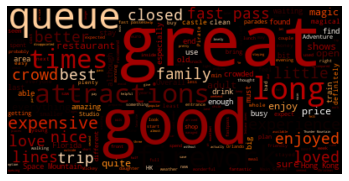

In [21]:
# creating the word cloud from all description,skipping the uppercase text
# Create stopword list:
stopwords4 = set(STOPWORDS)
stopwords4.update(["california", "paris", "hongkong", "rides","disney", "now", "will", "even", "got", "finish", "made", "well",
                  "ticket", "need", "park", "the", "them", "your", "us", "disneyland", "us","said",
                  "etc", "dont","make","take","now","one","even","thing","went", "people", "line", "day", "go", "ride", "fun", "see"
                 ,"always","past", "parks", "hours", "place", "time", "world", "really", "wait", "know", "want","though",
                 "still", "visit", "show", "first", "early", "tickets", "micky", "days", "much","theme", "still", "much", "lot"
                  "took", "way", "staff", "hotel", "food", "lot", "minute", "things", "going", "eat", "think", "year", "jone", "age","took",
                 "lots","another", "try", "around", "small", "every", "small","never","hour","minutes", "back","many", "picture",
                  "photo","looked","two","visited","left","kid","attraction","character", "say","parade"
                   ,"characters","children", "kids", "United","Disneyland_California","Disneyland_Paris","Disneyland_Hongkong",
                  "Australia","State","Kingdom","Worth","Night","States","STATES"])
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords4, background_color='black', colormap='gist_heat').generate(rat4)

# Display the generated image:
# the matplotlib way:
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis("off")
#plt.show()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

## Rating 5

In [22]:
#Rating for all == 5
df_8 = df[df.Rating == 5]
df_8.head()
df_rat_5 = df_8[["Review_Text", "Rating"]]
df_rat_5.head()

Review_Text  Rating
Review_ID                                                           
670585330  Great place! Your day will go by and you won't...       5
670570869  I can go on talking about Disneyland. Whatever...       5
670443403  Disneyland never cease to amaze me! I've been ...       5
670435886  We spent the day here with our grown kids and ...       5
670324965  It was indeed the happiest place on earth! My ...       5

In [23]:
#combine all the descrition and create the word cloud for rating 2
rat5 = " ".join(review for review in df_rat_5.Review_Text)
print ("There are {} words in the combination of all review.".format(len(rat5)))

There are 13722828 words in the combination of all review.


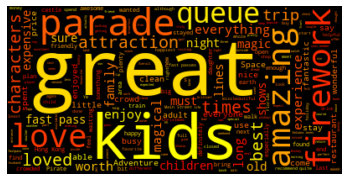

In [24]:
# creating the word cloud from all description,skipping the uppercase text
# Create stopword list:
stopwords5 = set(STOPWORDS)
stopwords5.update(["california", "paris", "hongkong", "rides","disney", "now", "will", "even", "got", "finish", "made", "well",
                  "ticket", "need", "park", "the", "them", "your", "us", "disneyland", "us","said",
                  "etc", "dont","make","take","now","one","even","thing","went", "people", "line", "day", "go", "ride", "fun", "see"
                 ,"always","past", "parks", "hours", "place", "time", "world", "really", "wait", "know", "want","though",
                 "still", "visit", "show", "first", "early", "tickets", "micky", "days", "much","theme", "still", "much", "lot"
                  "took", "way", "staff", "hotel", "food", "lot", "minute", "things", "going", "eat", "think", "year", "jone", "age","took",
                 "lots","another", "try", "around", "small", "every", "small","never","hour","minutes", "back","many", "picture",
                  "photo","looked","two","visited","good","better","left", "United","Disneyland_California","Disneyland_Paris",
                   "Disneyland_Hongkong",
                  "Kid","Character","Kingdom","Years","Mountain","States"])
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords5, background_color='black', colormap='autumn').generate(rat5)

# Display the generated image:
# the matplotlib way:
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis("off")
#plt.show()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

# stylecloud

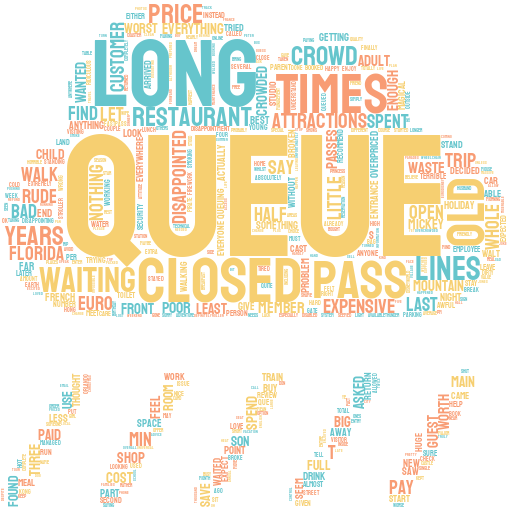

In [25]:
stylecloud.gen_stylecloud(rat1,
                          icon_name='fas fa-cloud-showers-heavy',
                          palette='cartocolors.qualitative.Pastel_3',
                          background_color='white',
                          output_name='rat1.png',
                          collocations=False,
                          custom_stopwords = stopwords1)
Image.open('rat1.png')

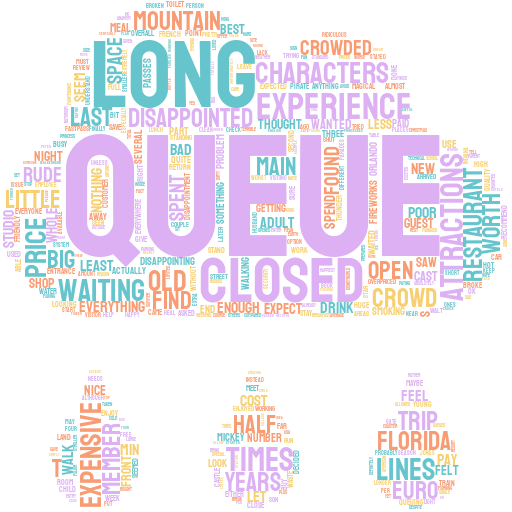

In [26]:
stylecloud.gen_stylecloud(rat2,
                          icon_name='fas fa-cloud-rain',
                          palette='cartocolors.qualitative.Pastel_4',
                          background_color='white',
                          output_name='rat2.png',
                          collocations=False,
                          custom_stopwords=stopwords2)
Image.open('rat2.png')

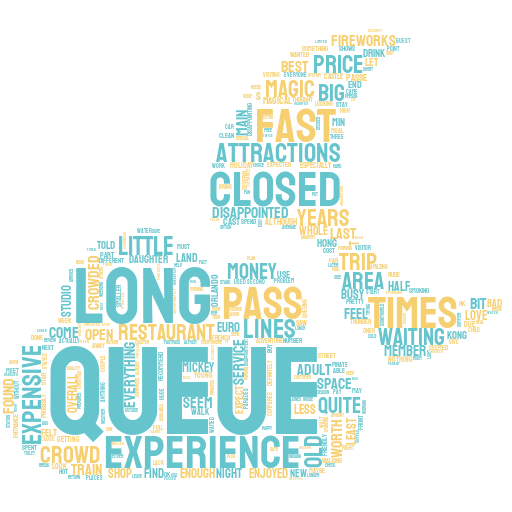

In [27]:
stylecloud.gen_stylecloud(rat3,
                          icon_name='fas fa-cloud-moon',
                          palette='cartocolors.qualitative.Pastel_2',
                          background_color='white',
                          output_name='rat3.png',
                          collocations=False,
                          custom_stopwords=stopwords3)
Image.open('rat3.png')

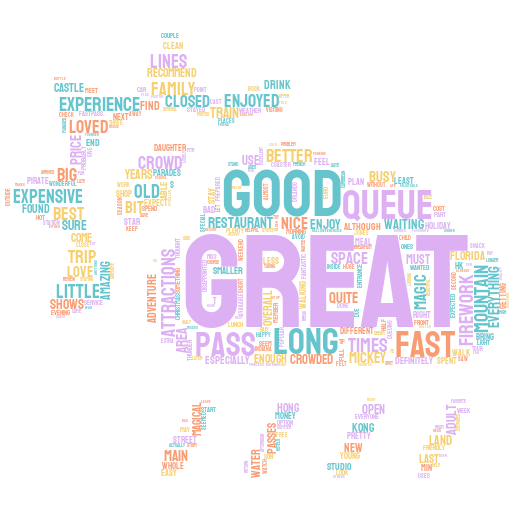

In [28]:
stylecloud.gen_stylecloud(rat4,
                          icon_name='fas fa-cloud-sun-rain',
                          palette='cartocolors.qualitative.Pastel_4',
                          background_color='white',
                          output_name='rat4.png',
                          collocations=False,
                          custom_stopwords=stopwords4)
Image.open('rat4.png')

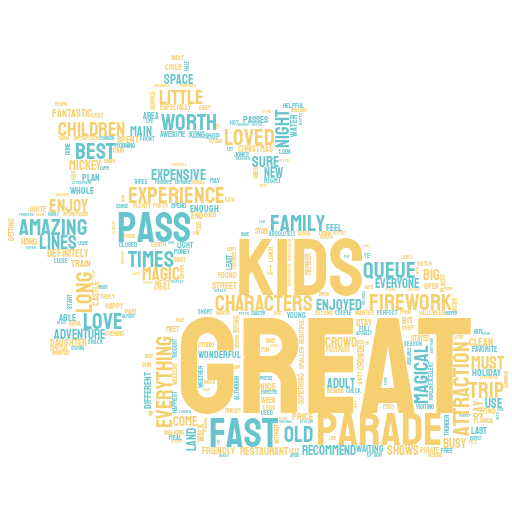

In [29]:
stylecloud.gen_stylecloud(rat5,
                          icon_name='fas fa-cloud-sun',
                          palette='cartocolors.qualitative.Pastel_2',
                          background_color='white',
                          output_name='rat5.png',
                          collocations=False,
                          custom_stopwords=stopwords5)
Image.open('rat5.png')

# DisneyLand California

In [30]:
#combine all the descrition and create the word cloud for Disney_California
text = " ".join(review for review in df_California.Review_Text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 12023521 words in the combination of all review.


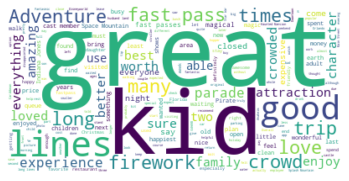

In [31]:
# creating the word cloud from all description,skipping the uppercase text
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["california", "paris", "hongkong", "rides","disney", "now", "will", "even", "got", "finish", "made", "well",
                  "ticket", "need", "park", "the", "them", "your", "us", "disneyland", "us","said",
                  "etc", "dont","make","take","now","one","even","thing","went", "people", "line", "day", "go", "ride", "fun", "see"
                 ,"always","past", "parks", "hours", "place", "time", "world", "really", "wait", "know", "want","though",
                 "still", "visit", "show", "first", "early", "tickets", "micky", "days", "much","theme", "still", "much", "lot"
                  "took", "way", "staff", "hotel", "food", "lot", "minute", "things", "going", "eat", "think", "year", "jone", "age","took",
                 "lots","another", "try", "around", "small", "every", "small","never","hour","minutes", "back"])
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis("off")
#plt.show()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [32]:
#png file , transform to array
micky = np.array(Image.open("micky.png"))
micky

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [33]:
def transform_format(val):
    if np.all(val == 0):
        return 255
    else:
        return val

In [34]:
# Transform your mask into a new one that will work with the function:
transformed_micky = np.ndarray((micky.shape[0],micky.shape[1]), np.int32)

for i in range(len(micky)):
    transformed_micky[i] = list(map(transform_format, micky[i]))

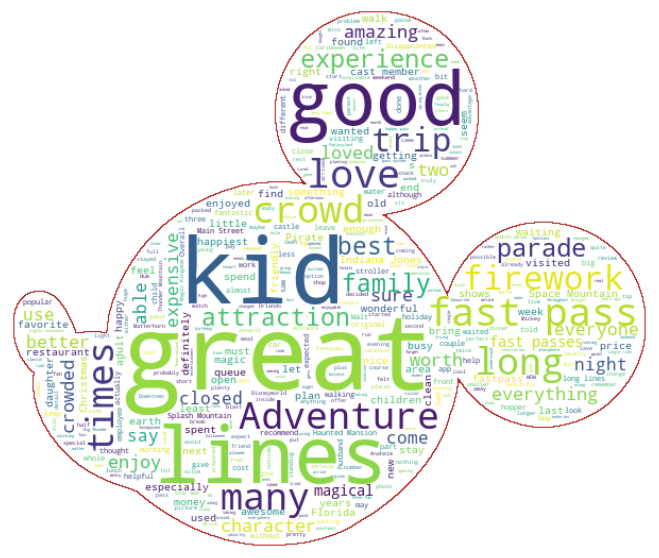

In [35]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=5000, mask=transformed_micky,# show my text in that word cloud
               stopwords=stopwords, contour_width=1, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("Cali.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## Graph shows Top 3 visitor location for California

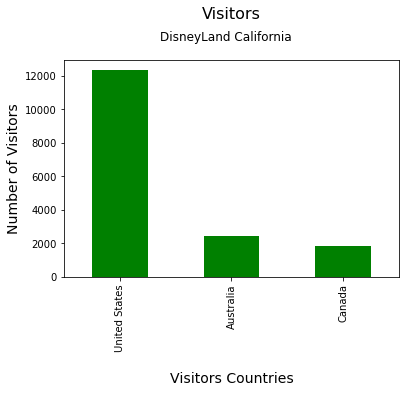

In [36]:
#Visitor at Disneyland California

df_cali_visitor = df[df['Branch'] == 'Disneyland_California']['Reviewer_Location']\
                .value_counts().sort_values(ascending = False).head(3)

# print("\nThe major groups of visitors at Disneyland California is: ", "\n\n" ,
#          df_california)

df_cali_visitor.plot(kind = 'bar', color = 'green')
plt.title("Visitors\n\n", fontsize = 16);
plt.suptitle('DisneyLand California\n', fontsize = 12)
plt.xlabel("\nVisitors Countries", fontsize = 14)
plt.ylabel("Number of Visitors", fontsize = 14);

## Peak time when people visit to California

In [37]:
#delete missing values
df = df[df['Year_Month'] != 'missing'].reset_index(drop = True)

In [38]:
# We will also convert Year_Month into a datetime format
from datetime import datetime as dt
print(df['Year_Month'])
#df['Year_Month'] = df['Year_Month'].dt.strftime('%Y-%m').add('-01 00:00:00.000')
#print(pd.to_datetime(df['Year_Month']).dt.to_period('M'))
df['Year_Month'] = pd.to_datetime(df['Year_Month']).dt.to_period('M')

0         2019-4
1         2019-5
2         2019-4
3         2019-4
4         2019-4
          ...   
40038     2011-1
40039     2011-1
40040    2010-12
40041    2010-12
40042     2010-9
Name: Year_Month, Length: 40043, dtype: object


In [39]:
# Adding the Month Column 
df.insert(loc=3, column='MONTH', value= df['Year_Month'].dt.month)

Text(0, 0.5, 'NUmber of Reviews')

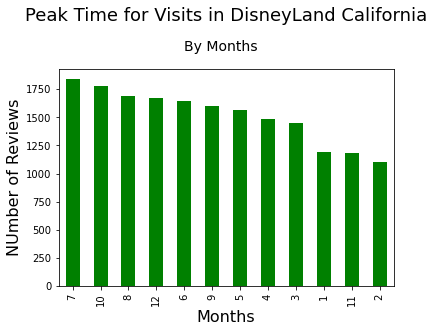

In [40]:
df_year_Cal = df[df['Branch'] == 'Disneyland_California']

df_year_Cal.MONTH.value_counts().plot(kind = 'bar', color = 'green')
plt.title("Peak Time for Visits in DisneyLand California\n\n", fontsize = 18);
plt.suptitle('By Months\n', fontsize = 14)
plt.xlabel("Months", fontsize = 16)
plt.ylabel("NUmber of Reviews", fontsize = 16)

## DisneyLand Hongkong

In [41]:
#combine all the descrition and create the word cloud for Disney_California
text = " ".join(review for review in df_HongKong.Review_Text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 5334237 words in the combination of all review.


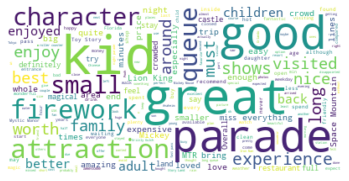

In [42]:
# creating the word cloud from all description,skipping the uppercase text
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["california", "paris", "hongkong", "rides","disney", "now", "will", "even", "got", "finish", "made", "well",
                  "ticket", "need", "park", "the", "them", "your", "us", "disneyland", "us","said",
                  "etc", "dont","make","take","now","one","even","thing","went", "people", "line", "day", "go", "ride", "fun", "see"
                 ,"always","past", "parks", "hours", "place", "time", "world", "really", "wait", "know", "want","though",
                 "still", "visit", "show", "first", "early", "tickets","going", "eat", "think","many","book","train",
                  "lunch","photo","took","lots","sure","two","find", "micky", "days", "much","theme", "still", "much", "lot"
                  "took", "way", "staff", "hotel", "food", "lot", "minute", "things", "going", "eat", "think","hong", "kong", 
                 "able","built","check","hk","little","year","old","different","ocean","photo","check","bit","street","main"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

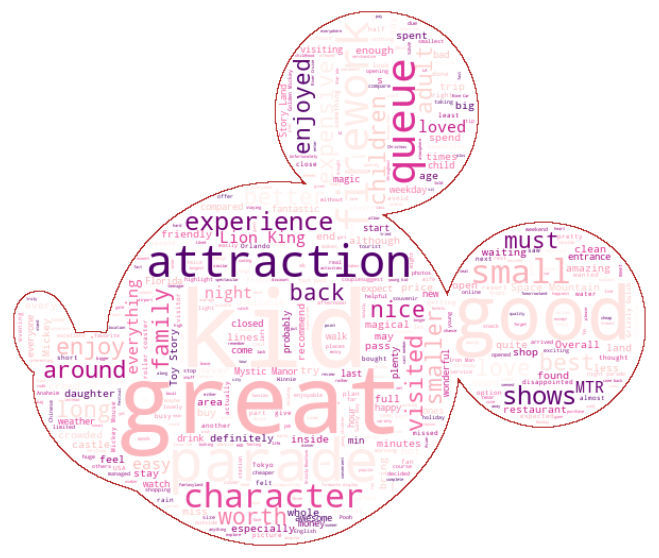

In [43]:
# Create a word cloud image
wc = WordCloud(background_color='white', colormap='RdPu', max_words=2500, mask=transformed_micky,# show my text in that word cloud
               stopwords=stopwords, contour_width=1, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("Hongkong.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## Graph shows Top 3 visitor location for Hongkong

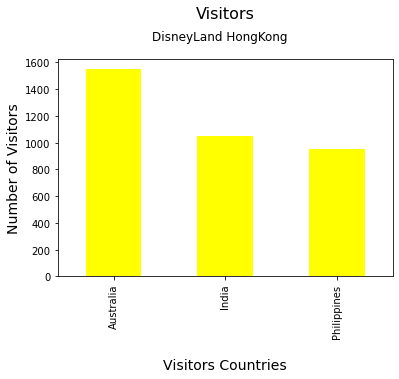

In [44]:
df_hongkong_visitor = df[df['Branch'] == 'Disneyland_HongKong']['Reviewer_Location']\
                .value_counts().sort_values(ascending = False).head(3)

# print("\n visitors at Disneyland Hongkong is: ", "\n\n" ,
#          df_hongkong)

df_hongkong_visitor.plot(kind = 'bar', color = 'Yellow')
plt.title("Visitors\n\n", fontsize = 16);
plt.suptitle('DisneyLand HongKong\n', fontsize = 12)
plt.xlabel("\nVisitors Countries", fontsize = 14)
plt.ylabel("Number of Visitors", fontsize = 14);

## Peak Time when people visit to Hongkong

In [45]:
#delete missing values
df = df[df['Year_Month'] != 'missing'].reset_index(drop = True)

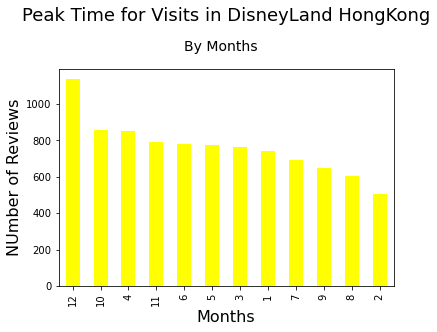

In [46]:
df_year_Cal = df[df['Branch'] == 'Disneyland_HongKong']

df_year_Cal.MONTH.value_counts().plot(kind = 'bar', color = 'yellow')
plt.title("Peak Time for Visits in DisneyLand HongKong\n\n", fontsize = 18);
plt.suptitle('By Months\n', fontsize = 14)
plt.xlabel("Months", fontsize = 16)
plt.ylabel("NUmber of Reviews", fontsize = 16);

# DisneyLand Paris

In [47]:
#combine all the descrition and create the word cloud for Disney_California
text = " ".join(review for review in df_Paris.Review_Text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 12408344 words in the combination of all review.


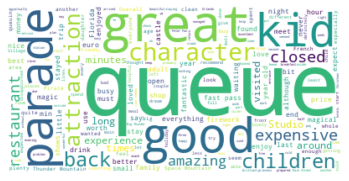

In [48]:
# creating the word cloud from all description,skipping the uppercase text
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["california", "paris", "hongkong", "rides","disney", "now", "will", "even", "got", "finish", "made", "well",
                  "ticket", "need", "park", "the", "them", "your", "us", "disneyland", "us","said",
                  "etc", "dont","make","take","now","one","even","thing","went", "people", "line", "day", "go", "ride", "fun", "see"
                 ,"always","past", "parks", "hours", "place", "time", "world", "really", "wait", "know", "want","though",
                 "still", "visit", "show", "first", "early", "tickets", "micky", "days", "much","theme", "still", "much", "lot"
                  "took", "way", "staff", "hotel", "food", "lot", "minute", "things", "going", "eat", "think","many","book","train",
                  "lunch","photo","took","lots","sure","two","find"])
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

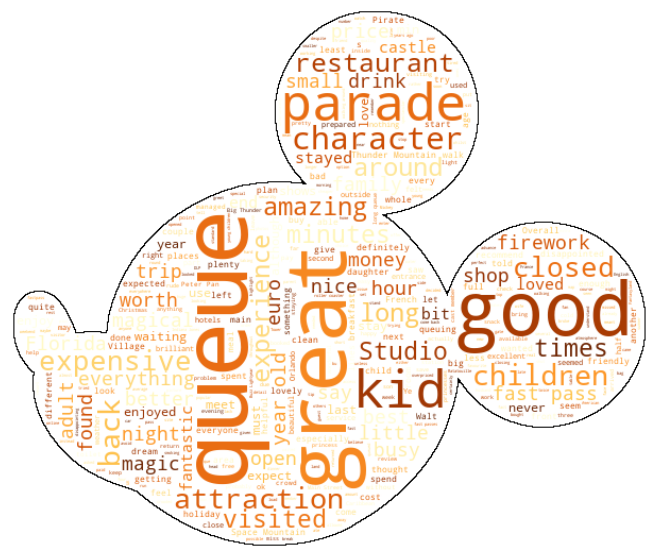

In [49]:
# Create a word cloud image
wc = WordCloud(background_color='white', colormap='YlOrBr', max_words=3000, mask=transformed_micky,# show my text in that word cloud
               stopwords=stopwords, contour_width=1)

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("Paris.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## Graph shows Top 3 visitor location for Paris

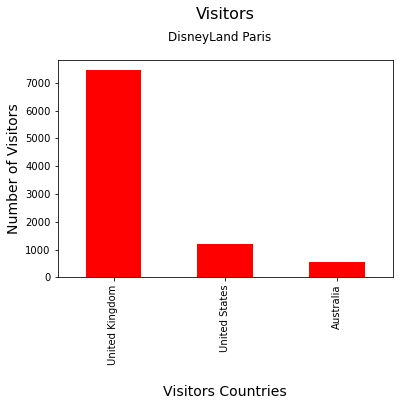

In [50]:

#Visitor at Disneyland Paris

df_paris_visitor = df[df['Branch'] == 'Disneyland_Paris']['Reviewer_Location']\
                .value_counts().sort_values(ascending = False).head(3)

# print("\nThe major groups of visitors at Disneyland Paris is: ", "\n\n" ,
#          df_paris_visitor)

df_paris_visitor.plot(kind = 'bar', color = 'red')
plt.title("Visitors\n\n", fontsize = 16);
plt.suptitle('DisneyLand Paris\n', fontsize = 12)
plt.xlabel("\nVisitors Countries", fontsize = 14)
plt.ylabel("Number of Visitors", fontsize = 14);

## Peak Time when people visit to Paris

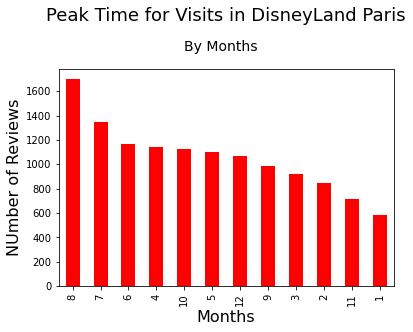

In [51]:
df_year_Cal = df[df['Branch'] == 'Disneyland_Paris']

df_year_Cal.MONTH.value_counts().plot(kind = 'bar', color = 'red')
plt.title("Peak Time for Visits in DisneyLand Paris\n\n", fontsize = 18);
plt.suptitle('By Months\n', fontsize = 14)
plt.xlabel("Months", fontsize = 16)
plt.ylabel("NUmber of Reviews", fontsize = 16);

# Topic Modeling

## California

In [52]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['disney', 'disneyland', 'park', 'disneyworld'])

In [55]:
df = pd.read_csv('DisneylandReviews.csv')
df

Review_ID  Rating Year_Month     Reviewer_Location  \
0      670772142       4     2019-4             Australia   
1      670682799       4     2019-5           Philippines   
2      670623270       4     2019-4  United Arab Emirates   
3      670607911       4     2019-4             Australia   
4      670607296       4     2019-4        United Kingdom   
...          ...     ...        ...                   ...   
42651    1765031       5    missing        United Kingdom   
42652    1659553       5    missing                Canada   
42653    1645894       5    missing          South Africa   
42654    1618637       4    missing         United States   
42655    1536786       4    missing        United Kingdom   

                                             Review_Text               Branch  
0      If you've ever been to Disneyland anywhere you...  Disneyland_HongKong  
1      Its been a while since d last time we visit HK...  Disneyland_HongKong  
2      Thanks God it wasn   t too hot or too humid wh...  Disneyland_HongKong  
3      HK Disneyland is a great compact park. Unfortu...  Disneyland_HongKong  
4      the location is not in the city, took around 1...  Disneyland_HongKong  
...                                                  ...                  ...  
42651  i went to disneyland paris in july 03 and thou...     Disneyland_Paris  
42652  2 adults and 1 child of 11 visited Disneyland ...     Disneyland_Paris  
42653  My eleven year old daughter and myself went to...     Disneyland_Paris  
42654  This hotel, part of the Disneyland Paris compl...     Disneyland_Paris  
42655  I went to the Disneyparis resort, in 1996, wit...     Disneyland_Paris  

[42656 rows x 6 columns]

In [56]:
cali = df[df['Branch'] == 'Disneyland_California']

In [57]:
cali_us = cali[(cali['Reviewer_Location'] == 'United States')]

In [58]:
cali_aus = cali[cali['Reviewer_Location'] == 'Australia']

In [61]:
cali_ca = cali[cali['Reviewer_Location'] == 'Canada']

In [65]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

### US

In [64]:
cali_us_text = list(cali_us['Review_Text'])

# Remove Emails
cali_us_text = [re.sub('\S*@\S*\s?', '', sent) for sent in cali_us_text]

# Remove new line characters
cali_us_text = [re.sub('\s+', ' ', sent) for sent in cali_us_text]

# Remove distracting single quotes
cali_us_text = [re.sub("\'", "", sent) for sent in cali_us_text]

data_words = list(sent_to_words(cali_us_text))

print(data_words[:1])

[['this', 'place', 'has', 'always', 'been', 'and', 'forever', 'will', 'be', 'special', 'the', 'feeling', 'you', 'get', 'entering', 'the', 'park', 'seeing', 'the', 'characters', 'and', 'different', 'attractions', 'is', 'just', 'priceless', 'this', 'is', 'definitely', 'dream', 'trip', 'for', 'all', 'ages', 'especially', 'young', 'kids', 'spend', 'the', 'money', 'and', 'go', 'to', 'disneyland', 'you', 'will', 'not', 'regret', 'it']]


In [69]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['this', 'place', 'has', 'always', 'been', 'and', 'forever', 'will', 'be', 'special', 'the', 'feeling', 'you', 'get', 'entering', 'the', 'park', 'seeing', 'the', 'characters', 'and', 'different', 'attractions', 'is', 'just', 'priceless', 'this', 'is', 'definitely', 'dream', 'trip', 'for', 'all', 'ages', 'especially', 'young', 'kids', 'spend', 'the', 'money', 'and', 'go', 'to', 'disneyland', 'you', 'will', 'not', 'regret', 'it']


In [70]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['place', 'always', 'forever', 'special', 'feeling', 'get', 'enter', 'see', 'character', 'different', 'attraction', 'priceless', 'definitely', 'dream', 'trip', 'age', 'especially', 'young', 'kid', 'spend', 'money', 'go', 'regret']]


In [71]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)]]


In [72]:
# Build LDA model
lda_model1 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [73]:
# Print the Keyword in the 10 topics
pprint(lda_model1.print_topics())
doc_lda = lda_model1[corpus]

[(0,
  '0.028*"people" + 0.013*"tell" + 0.013*"say" + 0.012*"guest" + 0.011*"ask" + '
  '0.010*"give" + 0.008*"service" + 0.008*"employee" + 0.008*"m" + '
  '0.007*"know"'),
 (1,
  '0.029*"time" + 0.027*"go" + 0.022*"great" + 0.019*"year" + 0.018*"ride" + '
  '0.017*"place" + 0.016*"visit" + 0.015*"love" + 0.015*"see" + 0.015*"kid"'),
 (2,
  '0.036*"show" + 0.017*"parade" + 0.015*"firework" + 0.014*"night" + '
  '0.013*"area" + 0.013*"see" + 0.011*"miss" + 0.011*"eat" + 0.011*"hotel" + '
  '0.010*"theme"'),
 (3,
  '0.047*"ride" + 0.044*"get" + 0.033*"day" + 0.029*"line" + 0.026*"go" + '
  '0.022*"wait" + 0.021*"time" + 0.019*"pass" + 0.015*"long" + 0.014*"do"')]


In [74]:
# Compute Perplexity
print('\nPerplexity: ', lda_model1.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model1, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.99056566283034

Coherence Score:  0.4014126402747987


In [75]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis1 = pyLDAvis.gensim_models.prepare(lda_model1, corpus, id2word)
vis1

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.201296 -0.119476       1        1  38.906442
3     -0.168469 -0.086399       2        1  37.250913
2      0.341816 -0.141332       3        1  13.323543
0      0.027949  0.347207       4        1  10.519101, topic_info=           Term          Freq         Total Category  logprob  loglift
11          get  10003.000000  10003.000000  Default  30.0000  30.0000
136        line   6538.000000   6538.000000  Default  29.0000  29.0000
124        show   2925.000000   2925.000000  Default  28.0000  28.0000
29          day   8280.000000   8280.000000  Default  27.0000  27.0000
88         ride  14954.000000  14954.000000  Default  26.0000  26.0000
..          ...           ...           ...      ...      ...      ...
91        think    311.802173   1740.796564   Topic4  -5.3237   0.5322
95          way    309.722768   1932.619454   Topic4  -5.3304   0.4210
77         make    308.421702   3665.336444   Topic4  -5.3346  -0.2232
414        even    276.208761   2908.856475   Topic4  -5.4449  -0.1024
198  experience    260.222770   2234.149331   Topic4  -5.5045   0.1019

[236 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
208       1  0.503439  adventure
208       2  0.354895  adventure
208       3  0.141592  adventure
0         1  0.999201        age
54        1  0.206579       also
...     ...       ...        ...
130       4  0.993865     worker
99        1  0.999602      world
2162      4  0.996474      write
101       1  0.999842       year
22        1  0.999325      young

[304 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 1])

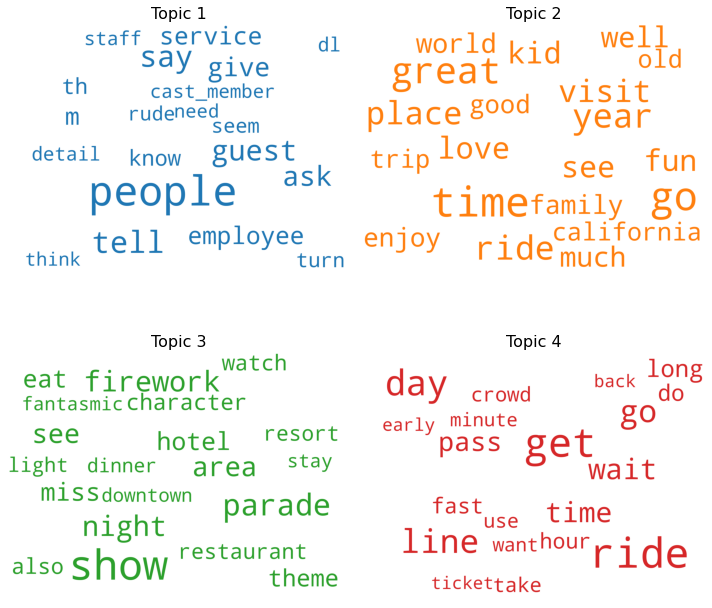

In [112]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model1.show_topics(formatted=False, num_words = 20)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

### AUS

In [76]:
cali_aus_text = list(cali_aus['Review_Text'])

In [77]:
# Remove Emails
cali_aus_text = [re.sub('\S*@\S*\s?', '', sent) for sent in cali_aus_text]

# Remove new line characters
cali_aus_text = [re.sub('\s+', ' ', sent) for sent in cali_aus_text]

# Remove distracting single quotes
cali_aus_text = [re.sub("\'", "", sent) for sent in cali_aus_text]

In [78]:
data_words = list(sent_to_words(cali_aus_text))

print(data_words[:1])

[['all', 'and', 'all', 'great', 'day', 'was', 'had', 'the', 'crowds', 'are', 'huge', 'and', 'ride', 'times', 'sometimes', 'up', 'to', 'min', 'wait', 'but', 'worth', 'it', 'very', 'disappointed', 'the', 'castle', 'was', 'under', 'repair', 'and', 'covered', 'but', 'we', 'understood', 'if', 'you', 'want', 'to', 'take', 'short', 'cut', 'on', 'the', 'rides', 'grab', 'max', 'pass', 'for', 'each', 'it', 'allows', 'you', 'to', 'book', 'time', 'every', 'mins', 'and', 'believe', 'me', 'its', 'great', 'feeling', 'floating', 'past', 'the', 'ques']]


In [79]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['all', 'and', 'all', 'great', 'day', 'was', 'had', 'the', 'crowds', 'are', 'huge', 'and', 'ride', 'times', 'sometimes', 'up', 'to', 'min', 'wait', 'but', 'worth', 'it', 'very', 'disappointed', 'the', 'castle', 'was', 'under', 'repair', 'and', 'covered', 'but', 'we', 'understood', 'if', 'you', 'want', 'to', 'take', 'short', 'cut', 'on', 'the', 'rides', 'grab', 'max', 'pass', 'for', 'each', 'it', 'allows', 'you', 'to', 'book', 'time', 'every', 'mins', 'and', 'believe', 'me', 'its', 'great', 'feeling', 'floating', 'past', 'the', 'ques']


In [80]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['great', 'day', 'crowd', 'huge', 'ride', 'time', 'sometimes', 'min', 'wait', 'worth', 'disappointed', 'castle', 'repair', 'cover', 'understand', 'want', 'take', 'short', 'cut', 'ride', 'grab', 'max', 'pass', 'allow', 'book', 'time', 'min', 'believe', 'great', 'feeling', 'float', 'past', 'que']]


In [81]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1)]]


In [82]:
# Build LDA model
lda_model2 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [83]:
# Print the Keyword in the 10 topics
pprint(lda_model2.print_topics())
doc_lda2 = lda_model2[corpus]

[(0,
  '0.018*"fill" + 0.014*"bear" + 0.009*"hat" + 0.009*"tower" + 0.009*"machine" '
  '+ 0.008*"fall" + 0.007*"sad" + 0.007*"type" + 0.006*"terror" + 0.006*"bar"'),
 (1,
  '0.038*"ride" + 0.033*"day" + 0.028*"go" + 0.028*"time" + 0.013*"wait" + '
  '0.013*"great" + 0.012*"see" + 0.012*"kid" + 0.012*"visit" + 0.012*"do"'),
 (2,
  '0.043*"place" + 0.035*"happy" + 0.033*"staff" + 0.018*"earth" + '
  '0.017*"wonderful" + 0.017*"anaheim" + 0.017*"clean" + 0.016*"friendly" + '
  '0.013*"helpful" + 0.013*"dream"'),
 (3,
  '0.036*"get" + 0.015*"take" + 0.014*"pass" + 0.014*"early" + 0.014*"stay" + '
  '0.013*"ticket" + 0.012*"hotel" + 0.011*"fast" + 0.010*"photo" + '
  '0.008*"buy"')]


In [84]:
# Compute Perplexity
print('\nPerplexity: ', lda_model2.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda2 = CoherenceModel(model=lda_model2, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda2 = coherence_model_lda2.get_coherence()
print('\nCoherence Score: ', coherence_lda2)


Perplexity:  -6.9000624872208425

Coherence Score:  0.4106497177335465


In [85]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis2 = pyLDAvis.gensim_models.prepare(lda_model2, corpus, id2word)
vis2

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.256194 -0.153454       1        1  68.371119
3      0.155922  0.191616       2        1  20.166545
2     -0.210726 -0.187607       3        1   9.696391
0     -0.201391  0.149445       4        1   1.765945, topic_info=          Term         Freq        Total Category  logprob  loglift
45       place   909.000000   909.000000  Default  30.0000  30.0000
63         get  1759.000000  1759.000000  Default  29.0000  29.0000
38       happy   389.000000   389.000000  Default  28.0000  28.0000
124      staff   384.000000   384.000000  Default  27.0000  27.0000
20        ride  3050.000000  3050.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
3582     score     8.420516     9.257915   Topic4  -5.4966   3.9417
1623  personal     9.941383    11.171537   Topic4  -5.3306   3.9198
2213    unique     7.219773     7.972744   Topic4  -5.6504   3.9373
2664      toad     7.096174     7.965595   Topic4  -5.6677   3.9209
1592    peanut     7.134632     8.463106   Topic4  -5.6623   3.8657

[223 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
557       1  0.137617  actually
557       2  0.286703  actually
557       3  0.584873  actually
619       4  0.944899       aim
140       1  0.585628      also
...     ...       ...       ...
407       2  0.036687     world
407       3  0.240132     world
139       1  0.977911      year
139       3  0.020905      year
338       1  0.996591     young

[263 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 1])

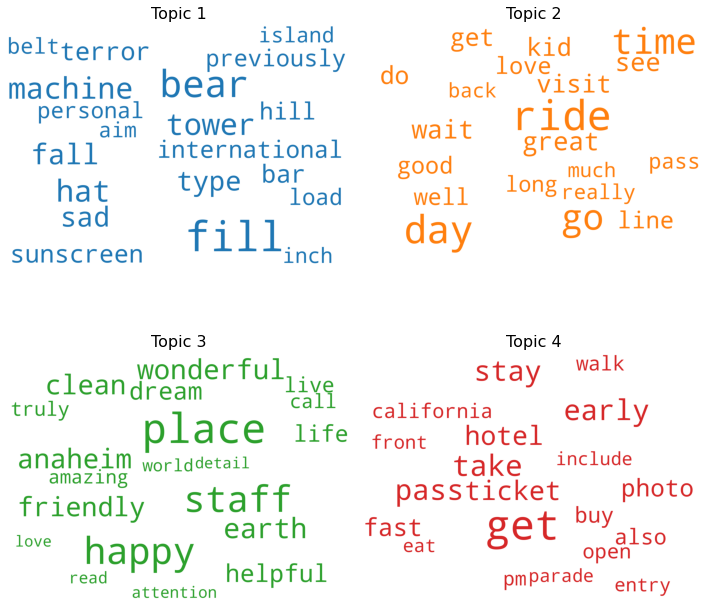

In [113]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model2.show_topics(formatted=False, num_words = 20)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

### Canada

In [86]:
cali_ca_text = list(cali_ca['Review_Text'])

In [87]:
# Remove Emails
cali_ca_text = [re.sub('\S*@\S*\s?', '', sent) for sent in cali_ca_text]

# Remove new line characters
cali_ca_text = [re.sub('\s+', ' ', sent) for sent in cali_ca_text]

# Remove distracting single quotes
cali_ca_text = [re.sub("\'", "", sent) for sent in cali_ca_text]

In [88]:
data_words = list(sent_to_words(cali_ca_text))

print(data_words[:1])

[['had', 'the', 'day', 'pass', 'spent', 'at', 'dl', 'and', 'one', 'at', 'ca', 'great', 'place', 'to', 'visit', 'we', 'will', 'be', 'back', 'saw', 'lot', 'in', 'those', 'days', 'but', 'there', 'is', 'more', 'that', 'we', 'missed', 'and', 'more', 'we', 'want', 'to', 'see', 'again']]


In [89]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['had', 'the', 'day', 'pass', 'spent', 'at', 'dl', 'and', 'one', 'at', 'ca', 'great', 'place', 'to', 'visit', 'we', 'will', 'be', 'back', 'saw', 'lot', 'in', 'those', 'days', 'but', 'there', 'is', 'more', 'that', 'we', 'missed', 'and', 'more', 'we', 'want', 'to', 'see', 'again']


In [90]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['day', 'pass', 'spend', 'great', 'place', 'visit', 'back', 'saw', 'lot', 'day', 'miss', 'want', 'see']]


In [91]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)]]


In [92]:
# Build LDA model
lda_model3 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [93]:
# Print the Keyword in the 10 topics
pprint(lda_model3.print_topics())
doc_lda3 = lda_model3[corpus]

[(0,
  '0.013*"guy" + 0.013*"alot" + 0.009*"chocolate" + 0.009*"waiting" + '
  '0.006*"box" + 0.006*"failure" + 0.006*"calif" + 0.006*"menu" + 0.006*"sort" '
  '+ 0.005*"belle"'),
 (1,
  '0.008*"several" + 0.008*"stroller" + 0.008*"pirate" + 0.008*"major" + '
  '0.007*"m" + 0.007*"rather" + 0.007*"th" + 0.007*"big_thunder" + '
  '0.007*"matterhorn" + 0.006*"attraction"'),
 (2,
  '0.027*"ride" + 0.025*"go" + 0.022*"time" + 0.020*"day" + 0.018*"get" + '
  '0.011*"line" + 0.011*"do" + 0.010*"good" + 0.010*"kid" + 0.010*"wait"'),
 (3,
  '0.014*"florida" + 0.014*"life" + 0.013*"disney" + 0.012*"original" + '
  '0.010*"flight" + 0.010*"walt" + 0.009*"block" + 0.009*"tour" + '
  '0.008*"certainly" + 0.008*"orlando"')]


In [94]:
# Compute Perplexity
print('\nPerplexity: ', lda_model3.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda3 = CoherenceModel(model=lda_model3, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda3 = coherence_model_lda3.get_coherence()
print('\nCoherence Score: ', coherence_lda3)


Perplexity:  -7.054491191175889

Coherence Score:  0.3818952754155956


In [95]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis3 = pyLDAvis.gensim_models.prepare(lda_model3, corpus, id2word)
vis3

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.366397  0.004149       1        1  86.985445
1     -0.117916 -0.240834       2        1   7.864499
3     -0.138123  0.136805       3        1   3.291332
0     -0.110358  0.099880       4        1   1.858725, topic_info=            Term         Freq        Total Category  logprob  loglift
268   attraction   288.000000   288.000000  Default  30.0000  30.0000
885     stroller   180.000000   180.000000  Default  29.0000  29.0000
559       pirate   171.000000   171.000000  Default  28.0000  28.0000
84            go  2221.000000  2221.000000  Default  27.0000  27.0000
361         call    84.000000    84.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
1320        sort    11.065799    21.333054   Topic4  -5.1409   3.3289
2322   generally    10.069646    20.377456   Topic4  -5.2352   3.2804
2038    official     6.369357     7.809010   Topic4  -5.6932   3.7815
361         call     8.726334    84.981527   Topic4  -5.3784   1.7092
6392         fla     6.919968    14.788004   Topic4  -5.6103   3.2259

[178 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
1213      4  0.993060          alot
5035      3  0.955594      altitude
1529      3  0.941955        amazed
4253      3  0.987209  announcement
1764      3  0.970721       anytime
...     ...       ...           ...
2000      2  0.329282          wind
2000      3  0.658563          wind
1195      4  0.895673         woman
1906      3  0.944843        wonder
1090      2  0.980347           zoo

[182 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 4, 1])

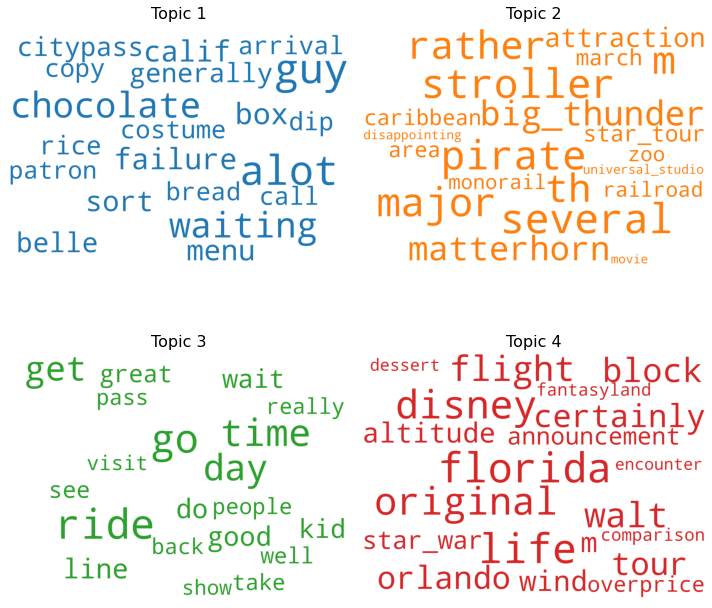

In [115]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model3.show_topics(formatted=False, num_words = 20)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

### Hong Kong

In [131]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'hkd', 'hong_kong', 'chinese', 'get','disneyland','disney','hk','hkg','do', 'also', 'even', 'pm', 'hkdl','hongkong', 're', 'go','whatever','ve','asian','else','much','d','s','singapore','china','walt', 'ngong-ke','s','head', 'face', 'do','ppl','land','earth','try','base', 'be', 'seem','apart','indian','asia'])

In [147]:
df = pd.read_csv('DisneylandReviews.csv')

In [148]:
HK = df[df['Branch'] == 'Disneyland_HongKong']

In [149]:
HK_aus = HK[(HK['Reviewer_Location'] == 'Australia')]

In [150]:
HK_ind = HK[(HK['Reviewer_Location'] == 'India')]

In [151]:
HK_phi = HK[(HK['Reviewer_Location'] == 'Philippines')]

### Australia

In [152]:
HK_aus_text = list(HK_aus['Review_Text'])

In [153]:
# Remove Emails
HK_aus_text = [re.sub('\S*@\S*\s?', '', sent) for sent in HK_aus_text]

# Remove new line characters
HK_aus_text = [re.sub('\s+', ' ', sent) for sent in HK_aus_text]

# Remove distracting single quotes
HK_aus_text = [re.sub("\'", "", sent) for sent in HK_aus_text]

In [154]:
data_words = list(sent_to_words(HK_aus_text))

print(data_words[:1])

[['if', 'youve', 'ever', 'been', 'to', 'disneyland', 'anywhere', 'youll', 'find', 'disneyland', 'hong', 'kong', 'very', 'similar', 'in', 'the', 'layout', 'when', 'you', 'walk', 'into', 'main', 'street', 'it', 'has', 'very', 'familiar', 'feel', 'one', 'of', 'the', 'rides', 'its', 'small', 'world', 'is', 'absolutely', 'fabulous', 'and', 'worth', 'doing', 'the', 'day', 'we', 'visited', 'was', 'fairly', 'hot', 'and', 'relatively', 'busy', 'but', 'the', 'queues', 'moved', 'fairly', 'well']]


In [155]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['if', 'youve', 'ever', 'been', 'to', 'disneyland', 'anywhere', 'youll', 'find', 'disneyland_hong_kong', 'very', 'similar', 'in', 'the', 'layout', 'when', 'you', 'walk', 'into', 'main_street', 'it', 'has', 'very', 'familiar', 'feel', 'one', 'of', 'the', 'rides', 'its', 'small', 'world', 'is', 'absolutely', 'fabulous', 'and', 'worth', 'doing', 'the', 'day', 'we', 'visited', 'was', 'fairly', 'hot', 'and', 'relatively', 'busy', 'but', 'the', 'queues', 'moved', 'fairly', 'well']


In [156]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['ve', 'ever', 'anywhere', 'find', 'similar', 'layout', 'walk', 'main_street', 'familiar', 'feel', 'ride', 'small', 'world', 'absolutely', 'fabulous', 'worth', 'day', 'visit', 'fairly', 'hot', 'relatively', 'busy', 'queue', 'move', 'fairly', 'well']]


In [157]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)]]


In [159]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [161]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.037*"park" + 0.037*"day" + 0.035*"ride" + 0.017*"great" + 0.017*"kid" + '
  '0.015*"small" + 0.014*"visit" + 0.012*"good" + 0.012*"child" + '
  '0.011*"food"'),
 (1,
  '0.012*"certainly" + 0.012*"english" + 0.011*"fill" + 0.009*"version" + '
  '0.008*"original" + 0.007*"extremely" + 0.007*"speak" + 0.007*"suit" + '
  '0.007*"aim" + 0.007*"talk"'),
 (2,
  '0.019*"time" + 0.016*"get" + 0.014*"wait" + 0.014*"go" + 0.014*"take" + '
  '0.013*"queue" + 0.012*"line" + 0.012*"ride" + 0.011*"day" + 0.010*"see"'),
 (3,
  '0.015*"room" + 0.014*"negative" + 0.012*"cater" + 0.012*"florida" + '
  '0.011*"laugh" + 0.011*"point" + 0.009*"present" + 0.009*"pool" + '
  '0.009*"colourful" + 0.008*"music"')]


In [162]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.936254044876556

Coherence Score:  0.41135095953696776


In [163]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.263376  0.178076       1        1  56.598413
2     -0.185784 -0.214985       2        1  35.235212
1      0.238850 -0.028097       3        1   5.474040
3      0.210309  0.065006       4        1   2.692335, topic_info=             Term         Freq        Total Category  logprob  loglift
101           get   426.000000   426.000000  Default  30.0000  30.0000
47           park  1738.000000  1738.000000  Default  29.0000  29.0000
39          great   725.000000   725.000000  Default  28.0000  28.0000
18          small   642.000000   642.000000  Default  27.0000  27.0000
20          visit   617.000000   617.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
3050       office     8.083262     8.743758   Topic4  -5.5360   3.5362
5096   waterslide     9.234427    10.024939   Topic4  -5.4029   3.5326
1761  frustrating    10.324114    11.335759   Topic4  -5.2913   3.5213
85           room    29.929537    46.422100   Topic4  -4.2269   3.1758
236        parent     9.801045    29.192364   Topic4  -5.3433   2.5233

[222 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1594      4  0.942074  admission
185       1  0.993543      adult
185       2  0.004320      adult
447       1  0.011338  afternoon
447       2  0.986408  afternoon
...     ...       ...        ...
22        2  0.037434       well
542       1  0.995903  wonderful
24        1  0.999149      worth
688       1  0.998394       year
113       1  0.999266      young

[246 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2, 4])

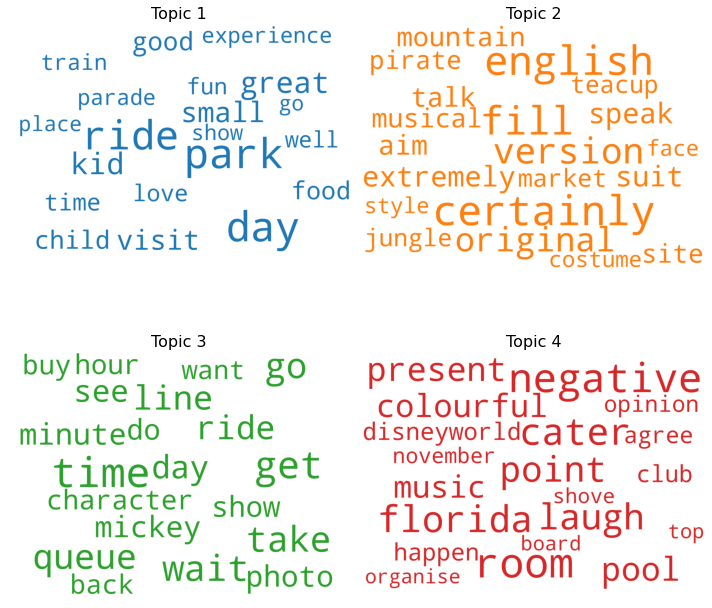

In [164]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  collocations = False,
                  width=2500,
                  height=1800,
                  max_words=25,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False, num_words = 20)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

### India

In [165]:
HK_ind_text = list(HK_ind['Review_Text'])

In [166]:
# Remove Emails
HK_ind_text = [re.sub('\S*@\S*\s?', '', sent) for sent in HK_ind_text]

# Remove new line characters
HK_ind_text = [re.sub('\s+', ' ', sent) for sent in HK_ind_text]

# Remove distracting single quotes
HK_ind_text = [re.sub("\'", "", sent) for sent in HK_ind_text]

In [167]:
data_words = list(sent_to_words(HK_ind_text))

print(data_words[:1])

[['great', 'place', 'your', 'day', 'will', 'go', 'by', 'and', 'you', 'wont', 'even', 'know', 'it', 'obviously', 'went', 'there', 'for', 'my', 'daughter', 'and', 'she', 'absolutely', 'loved', 'it', 'too', 'bad', 'the', 'parade', 'got', 'canceled', 'though']]


In [168]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=4, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['great', 'place', 'your', 'day', 'will', 'go', 'by', 'and', 'you', 'wont', 'even', 'know', 'it', 'obviously', 'went', 'there', 'for', 'my', 'daughter', 'and', 'she', 'absolutely', 'loved', 'it', 'too', 'bad', 'the', 'parade', 'got', 'canceled', 'though']


In [169]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['great', 'place', 'day', 'know', 'obviously', 'go', 'daughter', 'absolutely', 'love', 'bad', 'parade', 'get', 'cancel', 'though']]


In [170]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]]


In [171]:
# Build LDA model
lda_model2 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [172]:
# Print the Keyword in the 10 topics
print(lda_model2.print_topics())
doc_lda2 = lda_model2[corpus]

[(0, '0.018*"food" + 0.016*"available" + 0.011*"carry" + 0.010*"allow" + 0.010*"winnie" + 0.009*"check" + 0.009*"mean" + 0.007*"clean" + 0.007*"weather" + 0.006*"week"'), (1, '0.023*"ticket" + 0.010*"tourist" + 0.009*"airport" + 0.008*"buy" + 0.008*"online" + 0.008*"collect" + 0.006*"entrance" + 0.005*"hotel" + 0.005*"counter" + 0.005*"discount"'), (2, '0.035*"ride" + 0.032*"day" + 0.024*"kid" + 0.023*"park" + 0.021*"good" + 0.021*"visit" + 0.020*"place" + 0.015*"time" + 0.014*"show" + 0.013*"enjoy"'), (3, '0.040*"show" + 0.017*"mickey" + 0.015*"ride" + 0.014*"parade" + 0.013*"miss" + 0.012*"lion_ke" + 0.010*"queue" + 0.010*"watch" + 0.009*"line" + 0.008*"wait"')]


In [173]:
# Compute Perplexity
print('\nPerplexity: ', lda_model2.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda2 = CoherenceModel(model=lda_model2, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda2 = coherence_model_lda2.get_coherence()
print('\nCoherence Score: ', coherence_lda2)


Perplexity:  -6.928850924517253

Coherence Score:  0.35080133662624446


In [174]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis2 = pyLDAvis.gensim_models.prepare(lda_model2, corpus, id2word)
vis2

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.266083 -0.131747       1        1  66.201273
3     -0.092323  0.218816       2        1  18.904420
0      0.171275 -0.090767       3        1   9.185376
1      0.187130  0.003698       4        1   5.708931, topic_info=        Term        Freq       Total Category  logprob  loglift
49      show  719.000000  719.000000  Default  30.0000  30.0000
4        day  902.000000  902.000000  Default  29.0000  29.0000
144     food  284.000000  284.000000  Default  28.0000  28.0000
57    ticket  166.000000  166.000000  Default  27.0000  27.0000
146      kid  688.000000  688.000000  Default  26.0000  26.0000
...      ...         ...         ...      ...      ...      ...
1575   guide    8.340959   17.272577   Topic4  -5.6856   2.1352
165    hotel   13.445948  136.662560   Topic4  -5.2081   0.5443
88      give    9.743241   74.941727   Topic4  -5.5302   0.8230
220     main    8.145115   42.668714   Topic4  -5.7093   1.2071
1307  window    7.599847   17.695046   Topic4  -5.7786   2.0180

[224 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
138       1  0.998865          adult
270       1  0.435729      adventure
270       2  0.550394      adventure
270       3  0.011467      adventure
1839      2  0.970993  adventureland
...     ...       ...            ...
1082      3  0.973636         winnie
333       1  0.969022          world
333       2  0.025367          world
136       1  0.998713          worth
912       3  0.958806            yrs

[279 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 1, 2])

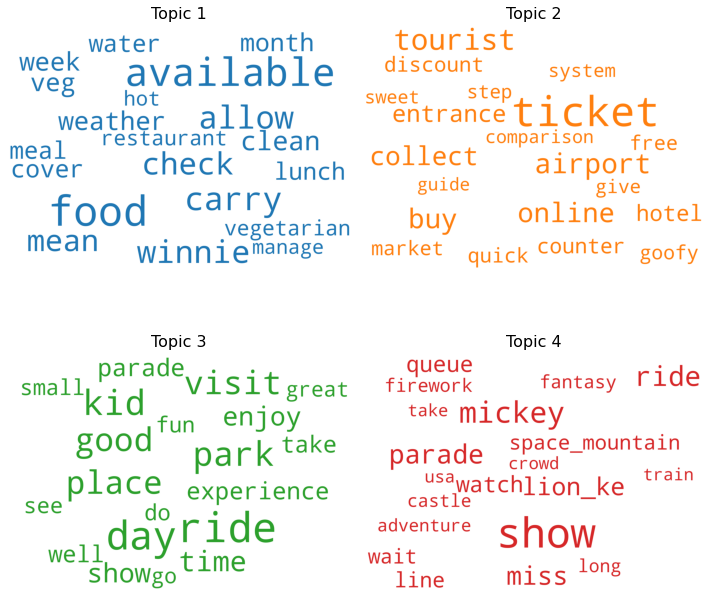

In [187]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  collocations = False, 
                  height=1800,
                  max_words=25,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model2.show_topics(formatted=False, num_words = 20)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

### Philippines

In [176]:
HK_phi_text = list(HK_phi['Review_Text'])

In [177]:
# Remove Emails
HK_phi_text = [re.sub('\S*@\S*\s?', '', sent) for sent in HK_phi_text]

# Remove new line characters
HK_phi_text = [re.sub('\s+', ' ', sent) for sent in HK_phi_text]

# Remove distracting single quotes
HK_phi_text = [re.sub("\'", "", sent) for sent in HK_phi_text]

In [178]:
data_words = list(sent_to_words(HK_phi_text))

print(data_words[:1])

[['its', 'been', 'while', 'since', 'last', 'time', 'we', 'visit', 'hk', 'disneyland', 'yet', 'this', 'time', 'we', 'only', 'stay', 'in', 'tomorrowland', 'aka', 'marvel', 'land', 'now', 'they', 'have', 'iron', 'man', 'experience', 'newly', 'open', 'ant', 'man', 'wasp', 'ironman', 'great', 'feature', 'so', 'exciting', 'especially', 'whole', 'scenery', 'of', 'hk', 'hk', 'central', 'area', 'to', 'kowloon', 'antman', 'changed', 'by', 'previous', 'buzz', 'lightyear', 'more', 'or', 'less', 'same', 'but', 'im', 'expecting', 'to', 'have', 'something', 'most', 'however', 'my', 'boys', 'like', 'it', 'space', 'mountain', 'turns', 'into', 'star', 'wars', 'this', 'is', 'great', 'for', 'cast', 'members', 'staffs', 'felt', 'bit', 'minus', 'point', 'from', 'before', 'just', 'dun', 'feel', 'like', 'its', 'disney', 'brand', 'seems', 'more', 'local', 'like', 'ocean', 'park', 'or', 'even', 'worst', 'they', 'got', 'no', 'smiling', 'face', 'but', 'just', 'wanna', 'to', 'enter', 'attraction', 'leave', 'hello'

In [179]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['its', 'been', 'while', 'since', 'last', 'time', 'we', 'visit', 'hk', 'disneyland', 'yet', 'this', 'time', 'we', 'only', 'stay', 'in', 'tomorrowland', 'aka', 'marvel', 'land', 'now', 'they', 'have', 'iron_man', 'experience', 'newly', 'open', 'ant', 'man', 'wasp', 'ironman', 'great', 'feature', 'so', 'exciting', 'especially', 'whole', 'scenery', 'of', 'hk', 'hk', 'central', 'area', 'to', 'kowloon', 'antman', 'changed', 'by', 'previous', 'buzz_lightyear', 'more', 'or', 'less', 'same', 'but', 'im', 'expecting', 'to', 'have', 'something', 'most', 'however', 'my', 'boys', 'like', 'it', 'space_mountain', 'turns', 'into', 'star_wars', 'this', 'is', 'great', 'for', 'cast_members', 'staffs', 'felt', 'bit', 'minus', 'point', 'from', 'before', 'just', 'dun', 'feel', 'like', 'its', 'disney', 'brand', 'seems', 'more', 'local', 'like', 'ocean', 'park', 'or', 'even', 'worst', 'they', 'got', 'no', 'smiling', 'face', 'but', 'just', 'wanna', 'to', 'enter', 'attraction', 'leave', 'hello', 'this', 'is', 

In [180]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['last', 'time', 'visit', 'time', 'stay', 'tomorrowland', 'aka', 'marvel', 'experience', 'newly', 'open', 'ant', 'man', 'wasp', 'ironman', 'great', 'feature', 'exciting', 'especially', 'whole', 'scenery', 'central', 'area', 'kowloon', 'antman', 'change', 'previous', 'buzz_lightyear', 'less', 'm', 'expect', 'however', 'boy', 'space_mountain', 'turn', 'star_war', 'great', 'staff', 'feel', 'bit', 'point', 'dun', 'feel', 'brand', 'seem', 'local', 'ocean', 'park', 'worst', 'get', 'smile', 'wanna', 'enter', 'attraction', 'leave', 'suppose', 'happy', 'place', 'brand', 'really', 'do', 'feel', 'bakery', 'main_street', 'attractive', 'delicacy', 'theme', 'sweet', 'good', 'point', 'last', 'starbuck', 'theme', 'park']]


In [181]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 3), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1), (28, 1), (29, 1), (30, 2), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 2), (42, 1), (43, 2), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 2), (57, 2), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1)]]


In [182]:
# Build LDA model
lda_model3 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [183]:
# Print the Keyword in the 10 topics
pprint(lda_model3.print_topics())
doc_lda3 = lda_model3[corpus]

[(0,
  '0.029*"ride" + 0.026*"time" + 0.024*"place" + 0.024*"show" + 0.023*"visit" '
  '+ 0.022*"parade" + 0.021*"day" + 0.021*"enjoy" + 0.016*"see" + '
  '0.014*"firework"'),
 (1,
  '0.032*"bring" + 0.012*"different" + 0.012*"make" + 0.011*"new" + '
  '0.010*"magic" + 0.009*"adventure" + 0.008*"know" + 0.008*"schedule" + '
  '0.007*"umbrella" + 0.007*"see"'),
 (2,
  '0.034*"ride" + 0.032*"park" + 0.018*"food" + 0.017*"good" + 0.016*"kid" + '
  '0.012*"line" + 0.011*"small" + 0.011*"people" + 0.011*"go" + 0.010*"do"'),
 (3,
  '0.019*"ticket" + 0.017*"take" + 0.016*"buy" + 0.014*"bring" + 0.011*"water" '
  '+ 0.009*"meal" + 0.008*"day" + 0.008*"entrance" + 0.007*"pass" + '
  '0.006*"station"')]


In [184]:
# Compute Perplexity
print('\nPerplexity: ', lda_model3.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda3 = CoherenceModel(model=lda_model3, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda3 = coherence_model_lda3.get_coherence()
print('\nCoherence Score: ', coherence_lda3)


Perplexity:  -6.990253940929276

Coherence Score:  0.29089680472096424


In [185]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis3 = pyLDAvis.gensim_models.prepare(lda_model3, corpus, id2word)
vis3

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.225396  0.079899       1        1  43.616360
2     -0.125174 -0.118514       2        1  33.953727
3      0.185565 -0.155543       3        1  11.375120
1      0.165006  0.194158       4        1  11.054793, topic_info=       Term        Freq       Total Category  logprob  loglift
93    bring  227.000000  227.000000  Default  30.0000  30.0000
175  parade  393.000000  393.000000  Default  29.0000  29.0000
169   enjoy  383.000000  383.000000  Default  28.0000  28.0000
41     park  613.000000  613.000000  Default  27.0000  27.0000
236    take  227.000000  227.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
126    walk   26.323019   94.764023   Topic4  -5.1554   0.9214
119     see   33.316198  347.258834   Topic4  -4.9198  -0.1417
732    keep   22.138727   48.646528   Topic4  -5.3285   1.4151
22     feel   25.650246  117.729650   Topic4  -5.1813   0.6785
122    show   23.996625  473.796162   Topic4  -5.2479  -0.7806

[262 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
626       1  0.968720         able
626       3  0.017775         able
626       4  0.017775         able
985       4  0.973196  accommodate
945       2  0.969420     actually
...     ...       ...          ...
1029      2  0.982227    wonderful
318       1  0.992698         year
1340      4  0.952895          yet
190       1  0.968484        young
190       2  0.033982        young

[388 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 4, 2])

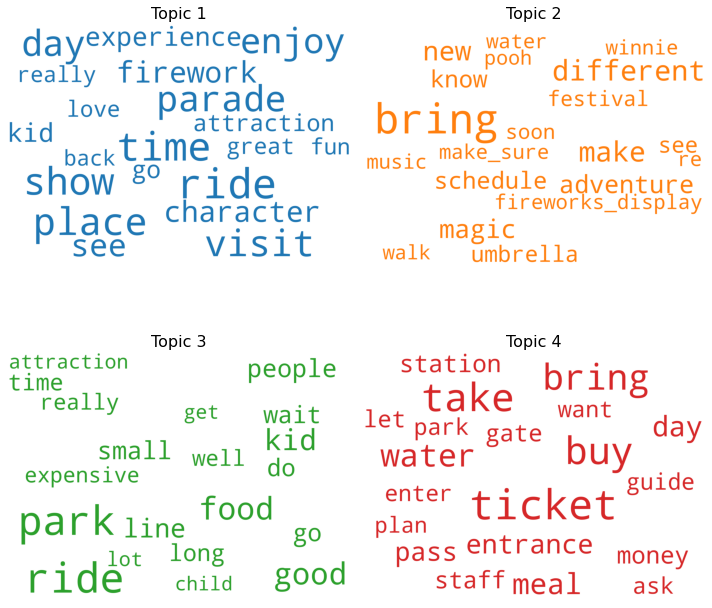

In [186]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  collocations = False,
                  width=2500,
                  height=1800,
                  max_words=25,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model3.show_topics(formatted=False, num_words = 20)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

## Paris

In [214]:
stop_words = stopwords.words('english')
stop_words.extend([ 'disney', 'park','disneyland'])

In [215]:
df = pd.read_csv('DisneylandReviews.csv')

In [216]:
paris = df[df['Branch'] == 'Disneyland_Paris']

In [217]:
paris_us = paris[(paris['Reviewer_Location'] == 'United States')]

In [218]:
paris_aus = paris[paris['Reviewer_Location'] == 'Australia']

In [219]:
paris_uk = paris[paris['Reviewer_Location'] == 'United Kingdom']

### United Kingdom

In [220]:
paris_uk_text = list(paris_uk['Review_Text'])

In [221]:
# Remove Emails
paris_uk_text = [re.sub('\S*@\S*\s?', '', sent) for sent in paris_uk_text]

# Remove new line characters
paris_uk_text = [re.sub('\s+', ' ', sent) for sent in paris_uk_text]

# Remove distracting single quotes
paris_uk_text = [re.sub("\'", "", sent) for sent in paris_uk_text]

In [222]:
data_words = list(sent_to_words(paris_uk_text))

print(data_words[:1])

[['went', 'to', 'disneyland', 'paris', 'in', 'april', 'on', 'easter', 'weekend', 'know', 'it', 'says', 'june', 'but', 'cant', 'choose', 'date', 'before', 'then', 'and', 'loved', 'it', 'me', 'and', 'my', 'mum', 'went', 'and', 'as', 'have', 'autism', 'we', 'managed', 'to', 'get', 'disability', 'pass', 'for', 'both', 'parks', 'disney', 'are', 'excellent', 'with', 'disability', 'access', 'and', 'cater', 'to', 'all', 'types', 'of', 'disabilities', 'both', 'visible', 'wheelchair', 'users', 'etc', 'and', 'invisible', 'autism', 'etc', 'we', 'managed', 'to', 'get', 'on', 'lot', 'of', 'rides', 'because', 'with', 'the', 'pass', 'you', 'dont', 'queue', 'in', 'the', 'normal', 'queue', 'but', 'the', 'entrance', 'for', 'disabilities', 'can', 'only', 'fault', 'one', 'thing', 'when', 'went', 'we', 'met', 'spider', 'man', 'and', 'had', 'photos', 'taken', 'but', 'you', 'have', 'to', 'pay', 'for', 'the', 'photos', 'and', 'they', 'are', 'very', 'expensive', 'even', 'to', 'just', 'pay', 'for', 'one', 'photo

In [223]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['went', 'to', 'disneyland', 'paris', 'in', 'april', 'on', 'easter', 'weekend', 'know', 'it', 'says', 'june', 'but', 'cant', 'choose', 'date', 'before', 'then', 'and', 'loved', 'it', 'me', 'and', 'my', 'mum', 'went', 'and', 'as', 'have', 'autism', 'we', 'managed', 'to', 'get', 'disability', 'pass', 'for', 'both', 'parks', 'disney', 'are', 'excellent', 'with', 'disability', 'access', 'and', 'cater', 'to', 'all', 'types', 'of', 'disabilities', 'both', 'visible', 'wheelchair_users', 'etc', 'and', 'invisible', 'autism', 'etc', 'we', 'managed', 'to', 'get', 'on', 'lot', 'of', 'rides', 'because', 'with', 'the', 'pass', 'you', 'dont', 'queue', 'in', 'the', 'normal', 'queue', 'but', 'the', 'entrance', 'for', 'disabilities', 'can', 'only', 'fault', 'one', 'thing', 'when', 'went', 'we', 'met', 'spider_man', 'and', 'had', 'photos', 'taken', 'but', 'you', 'have', 'to', 'pay', 'for', 'the', 'photos', 'and', 'they', 'are', 'very', 'expensive', 'even', 'to', 'just', 'pay', 'for', 'one', 'photo', 'the

In [224]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['go', 'paris', 'april', 'easter', 'weekend', 'know', 'say', 'june', 'choose', 'date', 'love', 'mum', 'go', 'autism', 'manage', 'get', 'disability', 'pass', 'park', 'excellent', 'disability', 'access', 'cater', 'type', 'disability', 'visible', 'wheelchair_user', 'invisible', 'autism', 'manage', 'get', 'lot', 'ride', 'pass', 'do', 'queue', 'normal', 'queue', 'entrance', 'disability', 'fault', 'thing', 'go', 'meet', 'photo', 'take', 'pay', 'photo', 'expensive', 'even', 'pay', 'photo', 'food', 'be', 'spectacular', 'edible', 'nice', 'variety', 'food', 'outlet', 'plenty', 'choice', 'love', 'go', 'halloween', 'christmas', 'love', 'go']]


In [225]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 4), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 2), (20, 5), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 3), (27, 2), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 2), (36, 2), (37, 3), (38, 1), (39, 2), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1)]]


In [226]:
# Build LDA model
lda_model33 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [227]:
# Print the Keyword in the 10 topics
pprint(lda_model33.print_topics())
doc_lda3 = lda_model33[corpus]

[(0,
  '0.019*"people" + 0.016*"queue" + 0.015*"staff" + 0.014*"ride" + '
  '0.012*"florida" + 0.011*"paris" + 0.010*"french" + 0.009*"seem" + '
  '0.009*"close" + 0.008*"say"'),
 (1,
  '0.039*"get" + 0.022*"hotel" + 0.019*"queue" + 0.017*"take" + 0.016*"day" + '
  '0.014*"go" + 0.013*"food" + 0.012*"ride" + 0.012*"stay" + 0.010*"euro"'),
 (2,
  '0.030*"go" + 0.026*"ride" + 0.024*"time" + 0.016*"day" + 0.015*"good" + '
  '0.015*"see" + 0.014*"great" + 0.013*"really" + 0.013*"do" + 0.011*"year"'),
 (3,
  '0.054*"room" + 0.014*"breakfast" + 0.011*"airport" + 0.011*"luggage" + '
  '0.010*"beer" + 0.009*"bed" + 0.008*"cheese" + 0.007*"pint" + 0.007*"glass" '
  '+ 0.007*"reception"')]


In [228]:
# Compute Perplexity
print('\nPerplexity: ', lda_model33.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda33 = CoherenceModel(model=lda_model33, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda33 = coherence_model_lda33.get_coherence()
print('\nCoherence Score: ', coherence_lda33)


Perplexity:  -7.090255872682177

Coherence Score:  0.39470865314422343


In [229]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis3 = pyLDAvis.gensim_models.prepare(lda_model33, corpus, id2word)
vis3

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.190208 -0.127777       1        1  44.284215
1      0.120055 -0.117271       2        1  32.223669
0      0.088188  0.279515       3        1  21.071864
3     -0.398451 -0.034467       4        1   2.420253, topic_info=          Term         Freq        Total Category  logprob  loglift
19         get  9229.000000  9229.000000  Default  30.0000  30.0000
103      hotel  4583.000000  4583.000000  Default  29.0000  29.0000
187     people  3062.000000  3062.000000  Default  28.0000  28.0000
101      great  4046.000000  4046.000000  Default  27.0000  27.0000
554       room   822.000000   822.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
350     coffee    89.717702   424.663776   Topic4  -5.1335   2.1667
1442  eurostar    81.247276   480.955652   Topic4  -5.2327   1.9430
691        tea    72.430887   269.675856   Topic4  -5.3476   2.4067
103      hotel    87.619563  4583.824971   Topic4  -5.1572  -0.2360
1535      call    71.322007   277.462378   Topic4  -5.3630   2.3628

[258 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
123       1  0.999267  absolutely
385       1  0.998999         age
1980      4  0.996605         air
2348      4  0.995696     airport
92        1  0.420422        also
...     ...       ...         ...
478       2  0.282338        work
478       3  0.661383        work
69        1  0.999759        year
301       1  0.939653       young
301       2  0.060069       young

[355 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1, 4])

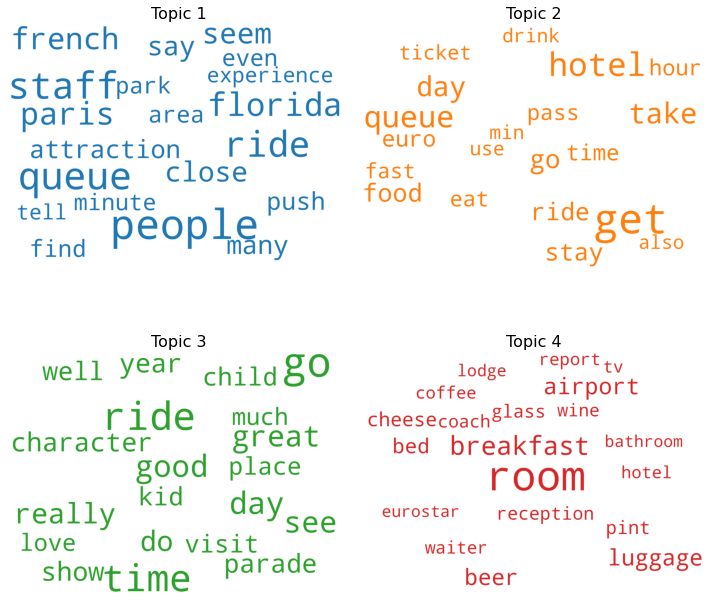

In [230]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model33.show_topics(formatted=False, num_words = 20)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

### US

In [231]:
paris_us_text = list(paris_us['Review_Text'])

In [232]:
# Remove Emails
paris_us_text = [re.sub('\S*@\S*\s?', '', sent) for sent in paris_us_text]

# Remove new line characters
paris_us_text = [re.sub('\s+', ' ', sent) for sent in paris_us_text]

# Remove distracting single quotes
paris_us_text = [re.sub("\'", "", sent) for sent in paris_us_text]

In [233]:
data_words = list(sent_to_words(paris_us_text))

print(data_words[:1])

[['rule', 'do', 'not', 'expect', 'the', 'warmth', 'of', 'disneyland', 'orlando', 'or', 'disneyland', 'california', 'it', 'will', 'be', 'cold', 'and', 'windy', 'and', 'maybe', 'rainy', 'dress', 'in', 'multiple', 'layers', 'rule', 'replace', 'churros', 'with', 'crepes', 'ratatouille', 'ride', 'is', 'amazing', 'it', 'is', 'an', 'imaginaires', 'creation', 'that', 'is', 'amazing', 'perfect', 'execution', 'of', 'bringing', 'the', 'movie', 'into', 'ride', 'and', 'then', 'walking', 'into', 'the', 'shey', 'remy', 'caf', 'and', 'smelling', 'all', 'the', 'good', 'french', 'food', 'hyperspace', 'mountain', 'is', 'the', 'funnest', 'ride', 'there', 'loved', 'how', 'they', 'finally', 'brought', 'star', 'wars', 'into', 'ride', 'it', 'was', 'amazing', 'and', 'not', 'long', 'wait', 'we', 'got', 'the', 'fast', 'pass', 'for', 'one', 'ride', 'each', 'and', 'worked', 'very', 'nicely', 'and', 'also', 'on', 'your', 'ticket', 'you', 'have', 'three', 'fast', 'passes', 'that', 'can', 'work', 'on', 'other', 'ride

In [234]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['rule', 'do', 'not', 'expect', 'the', 'warmth', 'of', 'disneyland', 'orlando', 'or', 'disneyland', 'california', 'it', 'will', 'be', 'cold', 'and', 'windy', 'and', 'maybe', 'rainy', 'dress', 'in', 'multiple', 'layers', 'rule', 'replace', 'churros', 'with', 'crepes', 'ratatouille', 'ride', 'is', 'amazing', 'it', 'is', 'an', 'imaginaires', 'creation', 'that', 'is', 'amazing', 'perfect', 'execution', 'of', 'bringing', 'the', 'movie', 'into', 'ride', 'and', 'then', 'walking', 'into', 'the', 'shey', 'remy', 'caf', 'and', 'smelling', 'all', 'the', 'good', 'french', 'food', 'hyperspace_mountain', 'is', 'the', 'funnest', 'ride', 'there', 'loved', 'how', 'they', 'finally', 'brought', 'star_wars', 'into', 'ride', 'it', 'was', 'amazing', 'and', 'not', 'long', 'wait', 'we', 'got', 'the', 'fast_pass', 'for', 'one', 'ride', 'each', 'and', 'worked', 'very', 'nicely', 'and', 'also', 'on', 'your', 'ticket', 'you', 'have', 'three', 'fast_passes', 'that', 'can', 'work', 'on', 'other', 'rides', 'so', 'th

In [235]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['rule', 'expect', 'warmth', 'orlando', 'california', 'cold', 'windy', 'maybe', 'rainy', 'dress', 'multiple', 'layer', 'rule', 'replace', 'churro', 'crepe', 'ratatouille', 'ride', 'amazing', 'imaginaire', 'creation', 'amazing', 'perfect', 'execution', 'bringing', 'movie', 'ride', 'walk', 'remy', 'caf', 'smell', 'good', 'french', 'food', 'hyperspace_mountain', 'funnest', 'ride', 'love', 'finally', 'bring', 'star_war', 'ride', 'amazing', 'long', 'wait', 'get', 'ride', 'work', 'nicely', 'also', 'ticket', 'fast_passe', 'work', 'ride', 'think', 'good', 'option', 'super', 'crowded', 'day', 'good', 'get', 'cold', 'thought', 'park', 'lot', 'fun', 'clean', 'right', 'lot', 'renovation', 'hollywood_studio', 'lot', 'ride', 'really', 'layout', 'castle', 'beautiful', 'magic', 'america', 'still', 'good', 'resort']]


In [236]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 3), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 4), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 3), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 7), (52, 1), (53, 2), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 2)]]


In [237]:
# Build LDA model
lda_model1 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [238]:
# Print the Keyword in the 10 topics
pprint(lda_model1.print_topics())
doc_lda = lda_model1[corpus]

[(0,
  '0.011*"mickey_mouse" + 0.008*"fence" + 0.006*"mgm" + 0.005*"magic_kingdom" '
  '+ 0.005*"pooh" + 0.004*"star" + 0.004*"winnie" + 0.004*"entertain" + '
  '0.004*"flagship" + 0.004*"discoveryland"'),
 (1,
  '0.024*"ride" + 0.020*"paris" + 0.019*"go" + 0.016*"day" + 0.015*"time" + '
  '0.012*"park" + 0.012*"get" + 0.010*"do" + 0.009*"line" + 0.008*"visit"'),
 (2,
  '0.021*"hotel" + 0.020*"room" + 0.013*"bus" + 0.009*"ask" + 0.008*"eurostar" '
  '+ 0.008*"service" + 0.006*"tell" + 0.006*"breakfast" + 0.005*"cook" + '
  '0.005*"man"'),
 (3,
  '0.019*"queue" + 0.018*"get" + 0.016*"hotel" + 0.015*"time" + 0.014*"food" + '
  '0.013*"kid" + 0.013*"character" + 0.011*"child" + 0.010*"go" + '
  '0.010*"good"')]


In [239]:
# Compute Perplexity
print('\nPerplexity: ', lda_model1.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model1, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.196141632155572

Coherence Score:  0.4188451418189808


In [240]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model1, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.240600  0.017329       1        1  68.110924
3     -0.166525 -0.023907       2        1  25.313374
2      0.206796 -0.174715       3        1   5.005150
0      0.200330  0.181294       4        1   1.570552, topic_info=           Term         Freq        Total Category  logprob  loglift
372       hotel   560.000000   560.000000  Default  30.0000  30.0000
248       queue   491.000000   491.000000  Default  29.0000  29.0000
97        paris  1369.000000  1369.000000  Default  28.0000  28.0000
157   character   333.000000   333.000000  Default  27.0000  27.0000
488        room   179.000000   179.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
3766     rating     5.781172    11.319087   Topic4  -5.6333   3.4819
857        star     7.050272    30.170885   Topic4  -5.4349   2.6999
1702       pull     5.178010     9.518251   Topic4  -5.7435   3.5450
1368      group     5.518372    22.767715   Topic4  -5.6798   2.7365
1336    imagine     4.597792    19.371535   Topic4  -5.8623   2.7155

[248 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
6974      4  0.834749  absoluteley
727       1  0.063350        adult
727       2  0.941200        adult
792       1  0.012488          age
792       2  0.986560          age
...     ...       ...          ...
1530      3  0.972676   wheelchair
3225      4  0.938459       winnie
1018      2  0.159416         word
1018      3  0.797078         word
496       1  0.999285        world

[310 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 1])

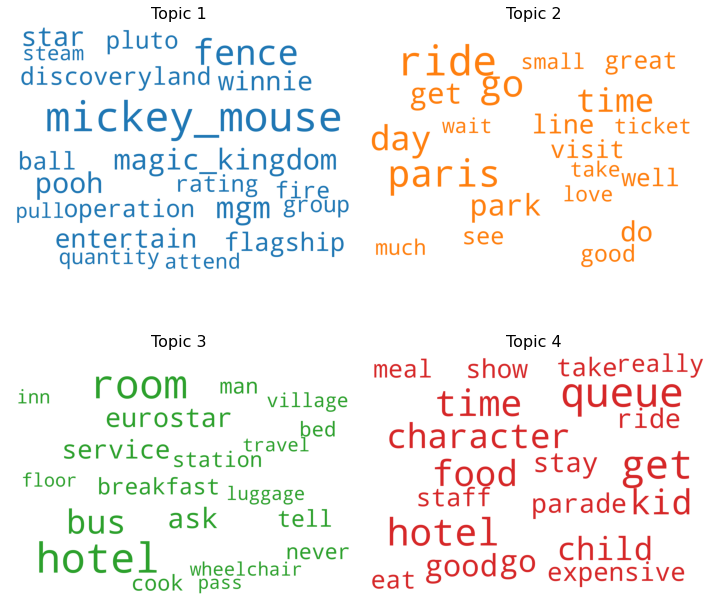

In [241]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model1.show_topics(formatted=False, num_words = 20)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

### AUS

In [242]:
paris_aus_text = list(paris_aus['Review_Text'])

In [243]:
# Remove Emails
paris_aus_text = [re.sub('\S*@\S*\s?', '', sent) for sent in paris_aus_text]

# Remove new line characters
paris_aus_text = [re.sub('\s+', ' ', sent) for sent in paris_aus_text]

# Remove distracting single quotes
paris_aus_text = [re.sub("\'", "", sent) for sent in paris_aus_text]

In [244]:
data_words = list(sent_to_words(paris_aus_text))

print(data_words[:1])

[['we', 'didnt', 'realise', 'it', 'was', 'school', 'holidays', 'when', 'we', 'went', 'so', 'consequently', 'it', 'was', 'extremely', 'busy', 'with', 'ride', 'wait', 'times', 'of', 'up', 'to', 'minutes', 'or', 'more', 'which', 'was', 'disappointing', 'we', 'only', 'went', 'on', 'rides', 'indiana', 'jones', 'the', 'temple', 'of', 'doom', 'which', 'was', 'fast', 'furious', 'fun', 'pirates', 'of', 'the', 'caribbean', 'which', 'was', 'amazing', 'enjoyed', 'them', 'both', 'we', 'also', 'liked', 'walking', 'through', 'aladdins', 'enchanted', 'passage', 'the', 'different', 'worlds', 'are', 'colourful', 'well', 'done', 'heaven', 'for', 'kids', 'adults', 'alike', 'we', 'ate', 'at', 'silver', 'spur', 'in', 'frontier', 'land', 'after', 'loooong', 'wait', 'to', 'get', 'table', 'even', 'though', 'it', 'wasnt', 'busy', 'inside', 'food', 'was', 'decidedly', 'average', 'despite', 'the', 'high', 'cost', 'pretty', 'much', 'every', 'little', 'building', 'was', 'full', 'of', 'expensive', 'merchandise', 'en

In [245]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['we', 'didnt', 'realise', 'it', 'was', 'school_holidays', 'when', 'we', 'went', 'so', 'consequently', 'it', 'was', 'extremely', 'busy', 'with', 'ride', 'wait', 'times', 'of', 'up', 'to', 'minutes', 'or', 'more', 'which', 'was', 'disappointing', 'we', 'only', 'went', 'on', 'rides', 'indiana_jones', 'the', 'temple', 'of', 'doom', 'which', 'was', 'fast', 'furious', 'fun', 'pirates', 'of', 'the', 'caribbean', 'which', 'was', 'amazing', 'enjoyed', 'them', 'both', 'we', 'also', 'liked', 'walking', 'through', 'aladdins', 'enchanted', 'passage', 'the', 'different', 'worlds', 'are', 'colourful', 'well', 'done', 'heaven', 'for', 'kids', 'adults', 'alike', 'we', 'ate', 'at', 'silver', 'spur', 'in', 'frontier_land', 'after', 'loooong', 'wait', 'to', 'get', 'table', 'even', 'though', 'it', 'wasnt', 'busy', 'inside', 'food', 'was', 'decidedly', 'average', 'despite', 'the', 'high', 'cost', 'pretty', 'much', 'every', 'little', 'building', 'was', 'full', 'of', 'expensive', 'merchandise', 'enjoyed', 'o

In [246]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['do', 'realise', 'school_holiday', 'go', 'consequently', 'extremely', 'busy', 'ride', 'wait', 'time', 'minute', 'disappoint', 'go', 'ride', 'temple', 'doom', 'fast', 'furious', 'fun', 'pirate', 'caribbean', 'amazing', 'enjoy', 'also', 'like', 'walk', 'aladdin', 'enchant', 'passage', 'different', 'world', 'colourful', 'well', 'do', 'kid', 'adult', 'alike', 'eat', 'silver', 'spur', 'frontier_land', 'loooong', 'wait', 'get', 'table', 'even', 'though', 'be', 'busy', 'food', 'decidedly', 'average', 'high', 'cost', 'pretty', 'much', 'little', 'building', 'full', 'expensive', 'merchandise', 'enjoy', 'day', 'prefer', 'go', 'less', 'busy', 'go', 'ride', 'battle', 'less', 'crowd']]


In [247]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 3), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 4), (35, 1), (36, 1), (37, 2), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 3), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 2), (58, 1), (59, 1), (60, 1)]]


In [248]:
# Build LDA model
lda_model22 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [249]:
# Print the Keyword in the 10 topics
pprint(lda_model22.print_topics())
doc_lda2 = lda_model22[corpus]

[(0,
  '0.010*"change" + 0.008*"serve" + 0.007*"staff" + 0.007*"american" + '
  '0.006*"rude" + 0.006*"speak" + 0.005*"european" + 0.005*"sandwich" + '
  '0.005*"tell" + 0.005*"resort"'),
 (1,
  '0.009*"mickey" + 0.008*"face" + 0.007*"table" + 0.007*"rude" + 0.006*"baby" '
  '+ 0.006*"game" + 0.006*"staff" + 0.006*"generally" + 0.005*"nearly" + '
  '0.005*"customer"'),
 (2,
  '0.032*"ride" + 0.022*"go" + 0.022*"day" + 0.018*"get" + 0.016*"time" + '
  '0.011*"paris" + 0.011*"queue" + 0.011*"do" + 0.010*"wait" + 0.010*"food"'),
 (3,
  '0.007*"drink" + 0.007*"tower" + 0.006*"smoke" + 0.005*"pm" + 0.005*"terror" '
  '+ 0.005*"review" + 0.005*"research" + 0.005*"mostly" + 0.005*"room" + '
  '0.005*"september"')]


In [250]:
# Compute Perplexity
print('\nPerplexity: ', lda_model22.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda22 = CoherenceModel(model=lda_model22, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda22 = coherence_model_lda22.get_coherence()
print('\nCoherence Score: ', coherence_lda22)


Perplexity:  -6.940483443652715

Coherence Score:  0.3901150170772053


In [251]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis2 = pyLDAvis.gensim_models.prepare(lda_model22, corpus, id2word)
vis2

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.307521  0.000113       1        1  85.684049
0      0.089299 -0.138445       2        1   5.778616
3      0.094816  0.163459       3        1   5.400653
1      0.123406 -0.025127       4        1   3.136683, topic_info=         Term        Freq       Total Category  logprob  loglift
148     staff  194.000000  194.000000  Default  30.0000  30.0000
365        pm   81.000000   81.000000  Default  29.0000  29.0000
388     drink   51.000000   51.000000  Default  28.0000  28.0000
846      tell   64.000000   64.000000  Default  27.0000  27.0000
146     smoke   51.000000   51.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
2094    awful    3.885400    9.345490   Topic4  -5.7461   2.5843
148     staff    7.280828  194.129438   Topic4  -5.1181   0.1787
1113  already    3.969334   12.828632   Topic4  -5.7247   2.2889
346      wife    3.401823    7.339083   Topic4  -5.8790   2.6931
560   perhaps    3.471092    9.548151   Topic4  -5.8589   2.4501

[219 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
821       4  0.947835     action
663       3  0.491885        add
663       4  0.393508        add
1247      3  0.721144  adventure
1247      4  0.206041  adventure
...     ...       ...        ...
60        2  0.179410      world
319       1  0.998689      worth
1646      3  0.916675      write
516       3  0.919825        yet
157       3  0.968581       zone

[275 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 2])

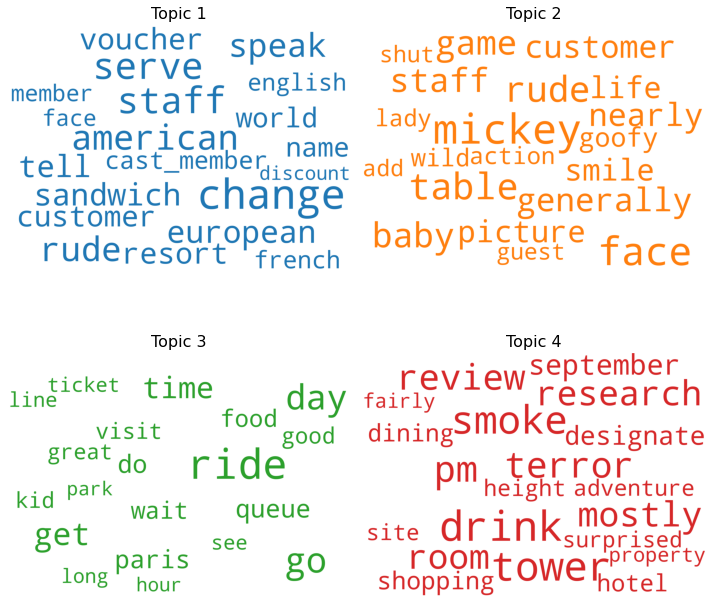

In [252]:
#visualization

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model22.show_topics(formatted=False, num_words = 20)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()